In [1]:
import illustris_python as il
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm.notebook import tqdm

In [ ]:
Classified_subhalos = np.genfromtxt('Classified_subhalos_TNG50-1.csv',skip_header=1,delimiter=',')
basePath = "sims.TNG/TNG50-1/output"
fields = ['SubhaloMass','SubfindID','SnapNum']

  0%|          | 0/261 [00:00<?, ?it/s]

Text(0,0.5,'Total Subhalo Mass [code units]')

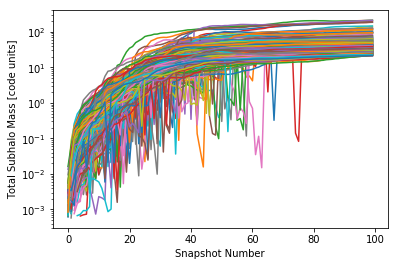

In [18]:

for i in tqdm(range(len(Classified_subhalos[:,1]))):
    subhaloid = Classified_subhalos[i,1]
    
    tree = il.sublink.loadTree(basePath,99,subhaloid,fields=fields,onlyMPB=True)
    plt.plot(tree['SnapNum'],tree['SubhaloMass'],'-')
    continue

plt.yscale('log')
plt.xlabel('Snapshot Number')
plt.ylabel('Total Subhalo Mass [code units]')

Text(0,0.5,'Total Subhalo Mass [code units]')

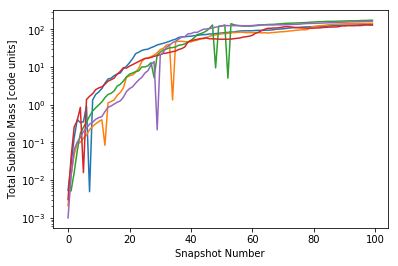

In [19]:
GroupFirstSub = il.groupcat.loadHalos(basePath,99,fields=['GroupFirstSub'])
fields = ['SubhaloMass','SubfindID','SnapNum']
start = 100
for i in range(start,start+5):
    tree = il.sublink.loadTree(basePath,99,GroupFirstSub[i],fields=fields,onlyMPB=True)
    plt.plot(tree['SnapNum'],tree['SubhaloMass'],'-')
plt.yscale('log')
plt.xlabel('Snapshot Number')
plt.ylabel('Total Subhalo Mass [code units]')

# LETS MAKE THAT GRIDSPEC

  0%|          | 0/11 [00:00<?, ?it/s]

subhalo_images/Subhalos_trees_0.png
subhalo_images/Subhalos_trees_25.png
subhalo_images/Subhalos_trees_50.png
subhalo_images/Subhalos_trees_75.png
subhalo_images/Subhalos_trees_100.png
subhalo_images/Subhalos_trees_125.png
subhalo_images/Subhalos_trees_150.png
subhalo_images/Subhalos_trees_175.png
subhalo_images/Subhalos_trees_200.png
subhalo_images/Subhalos_trees_225.png
subhalo_images/Subhalos_trees_250.png


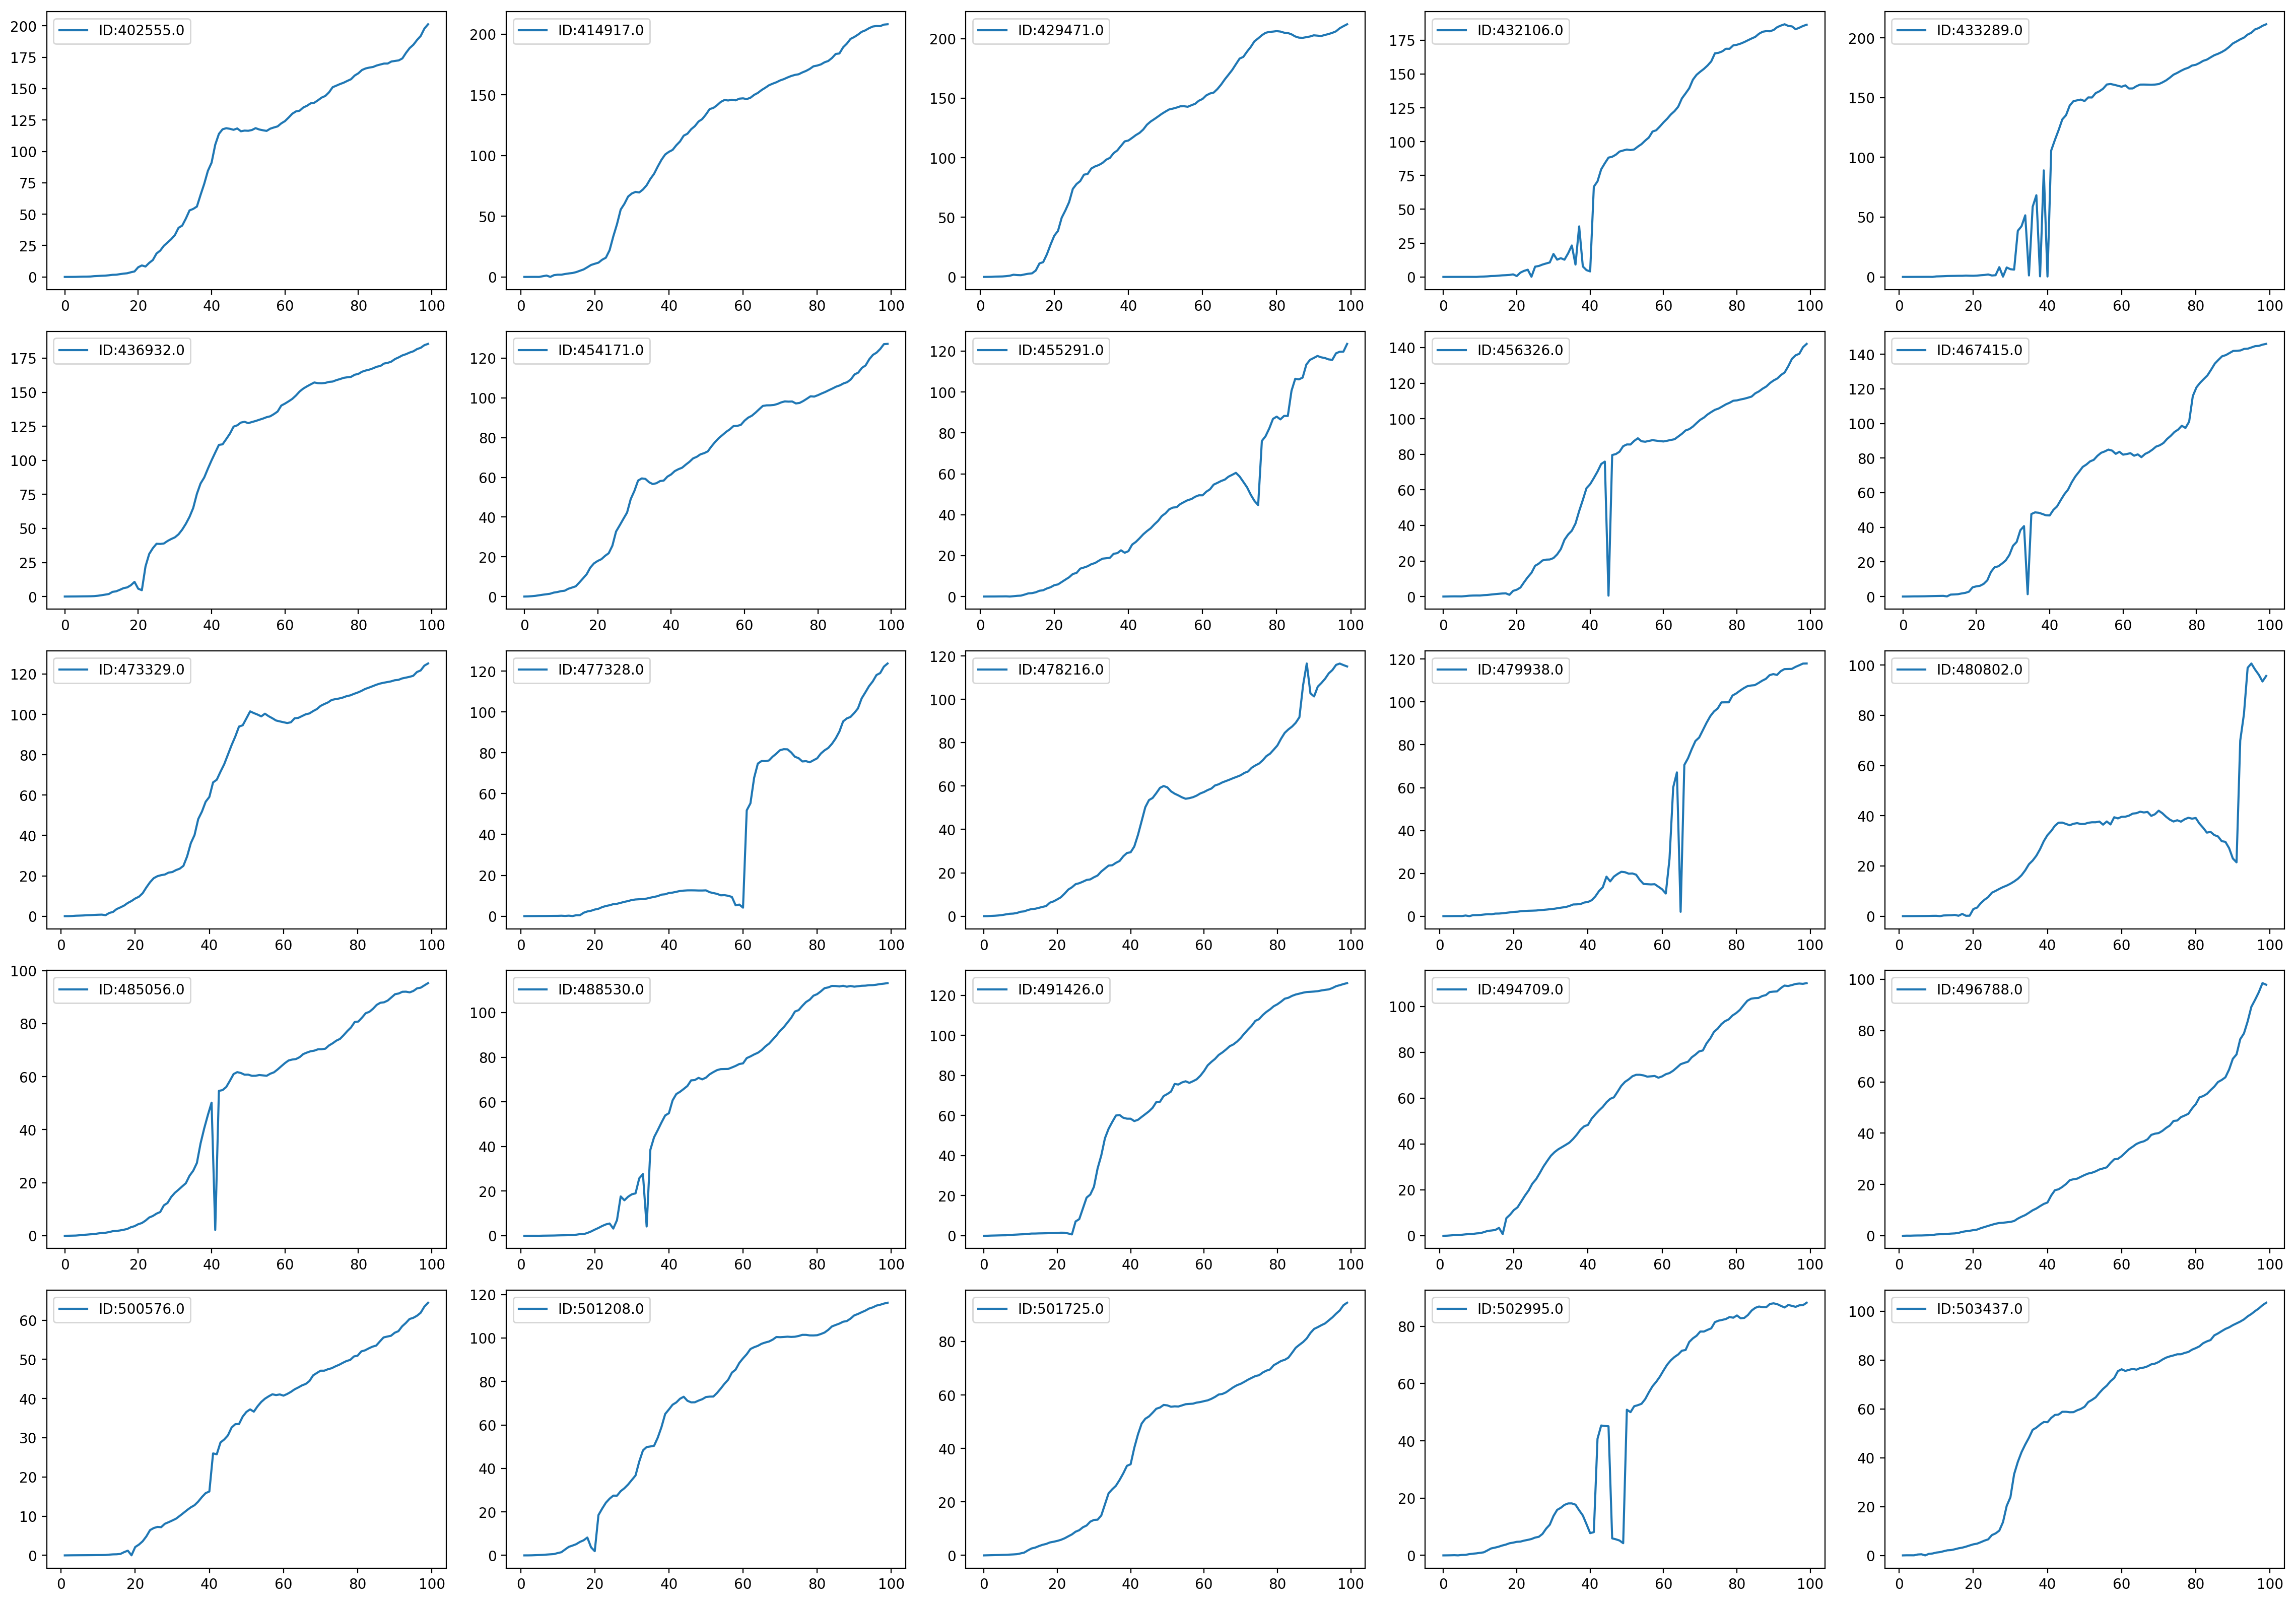

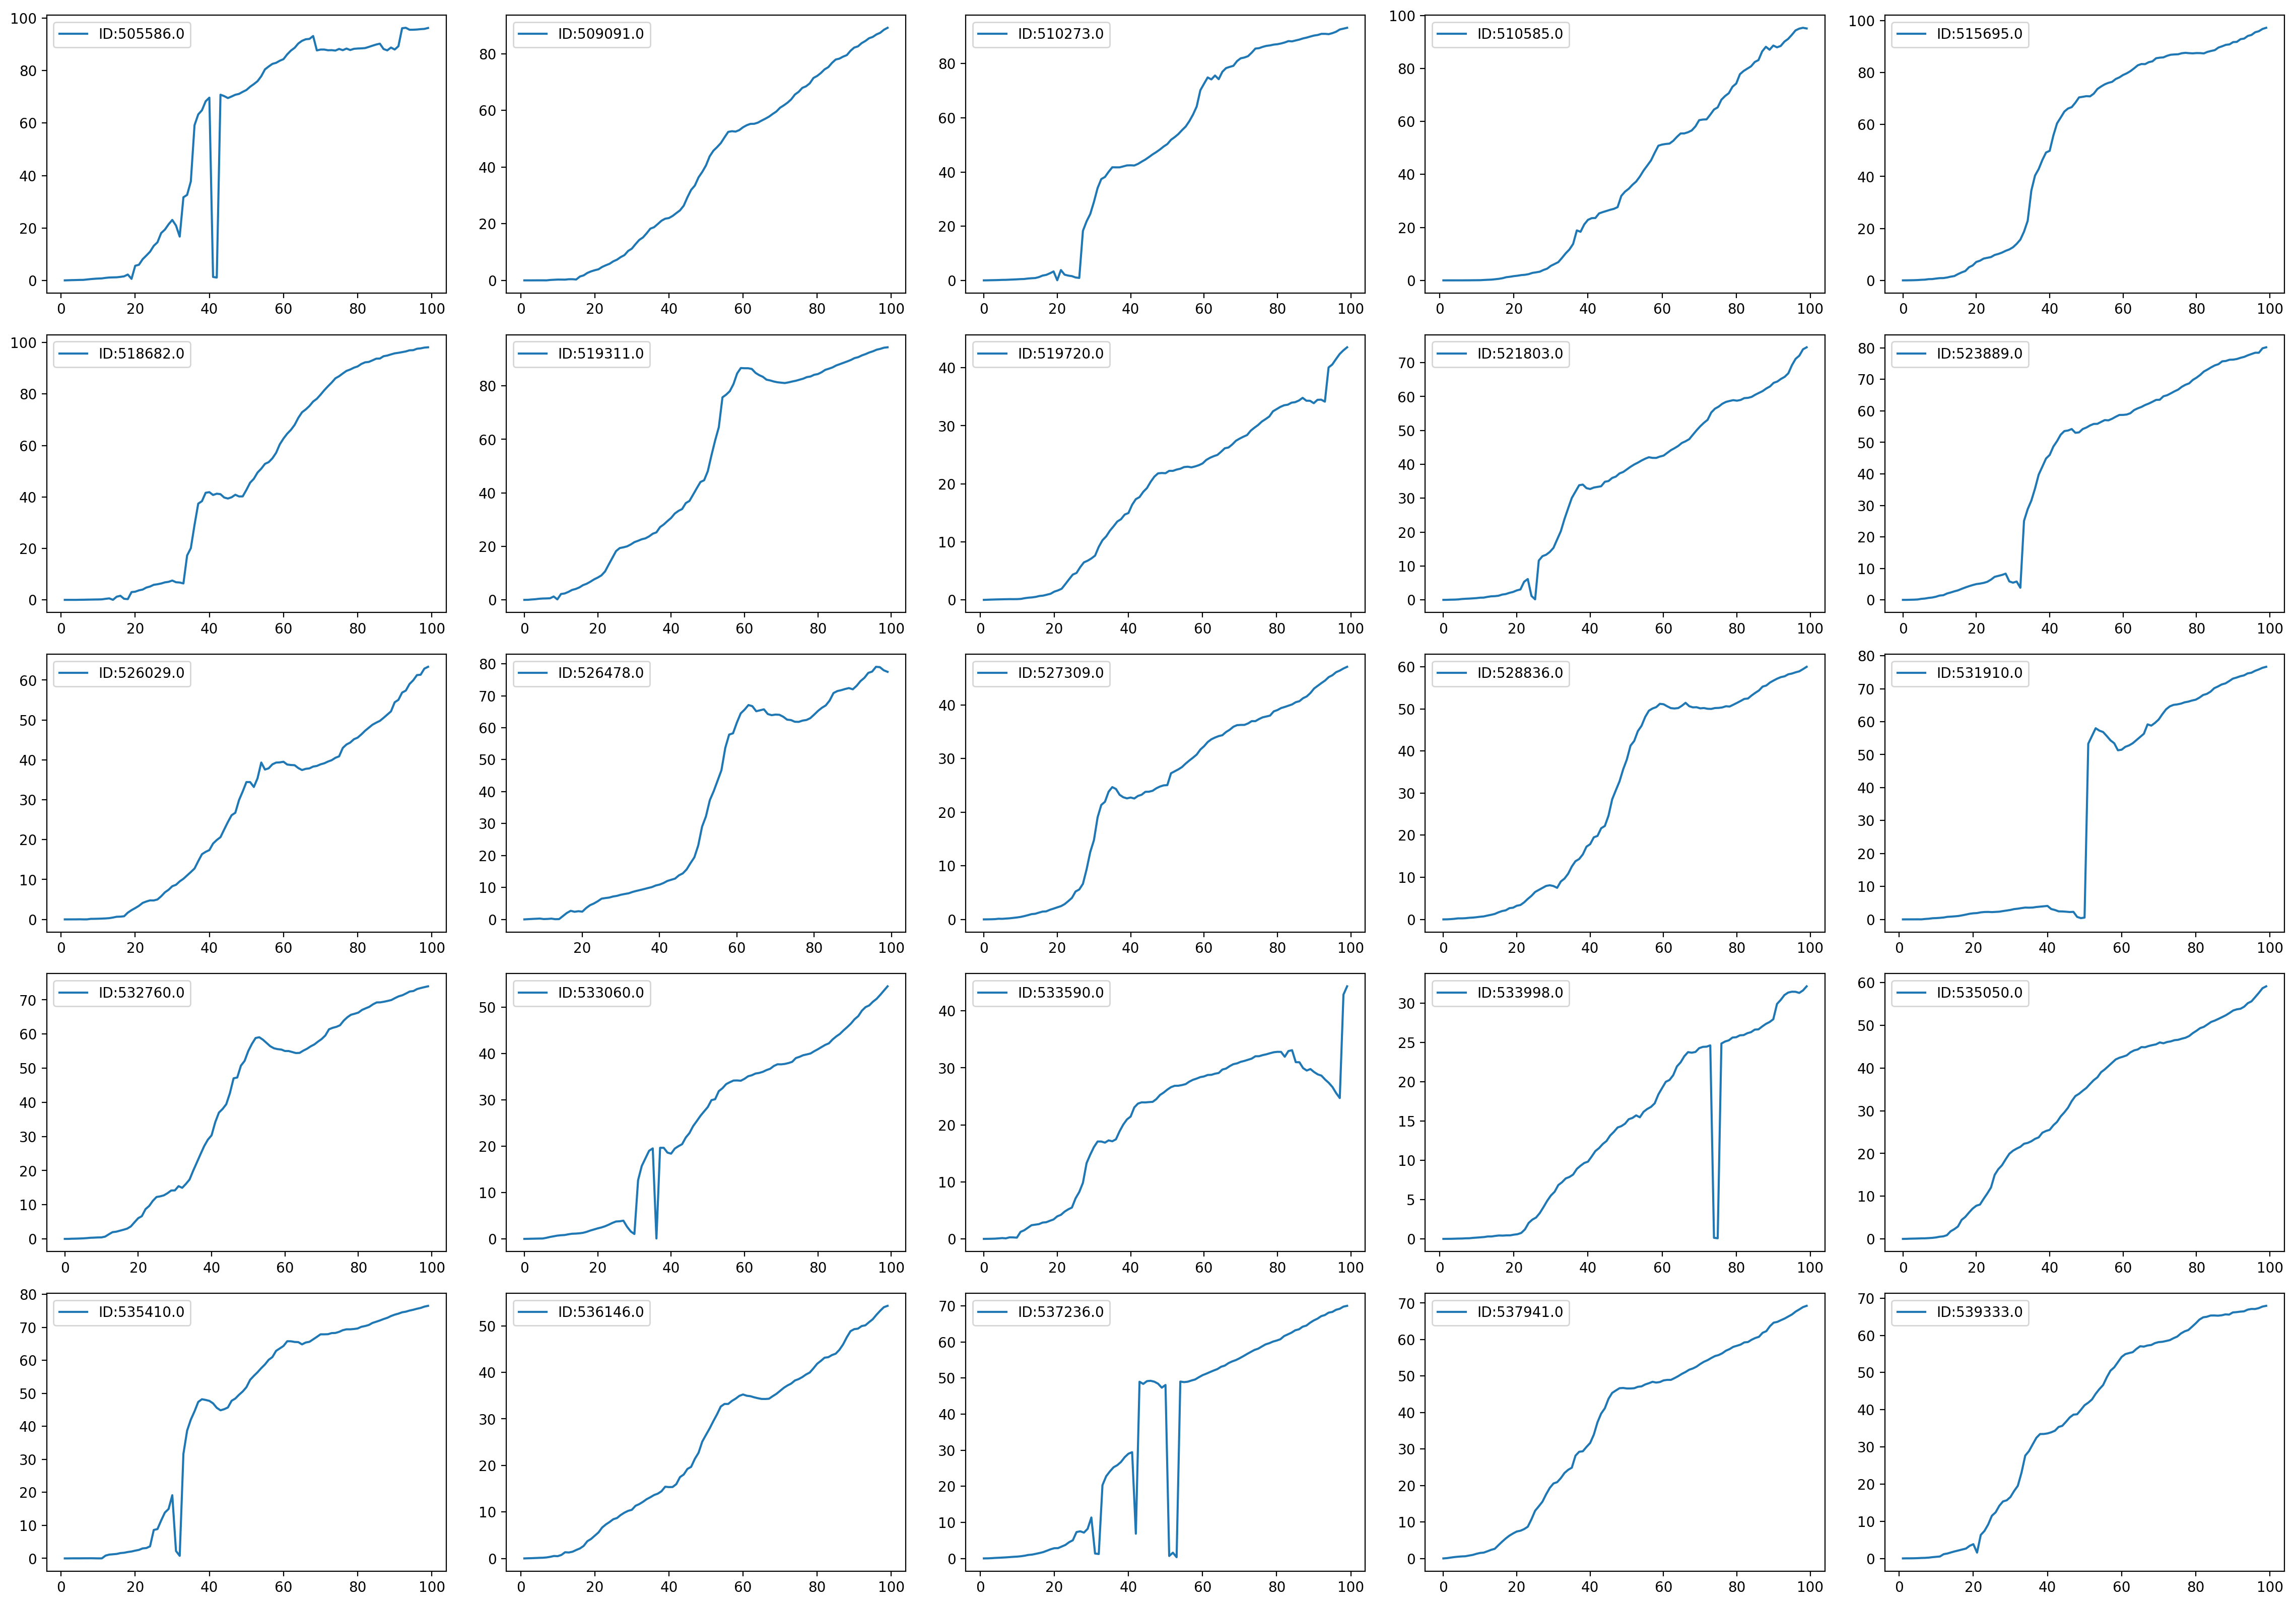

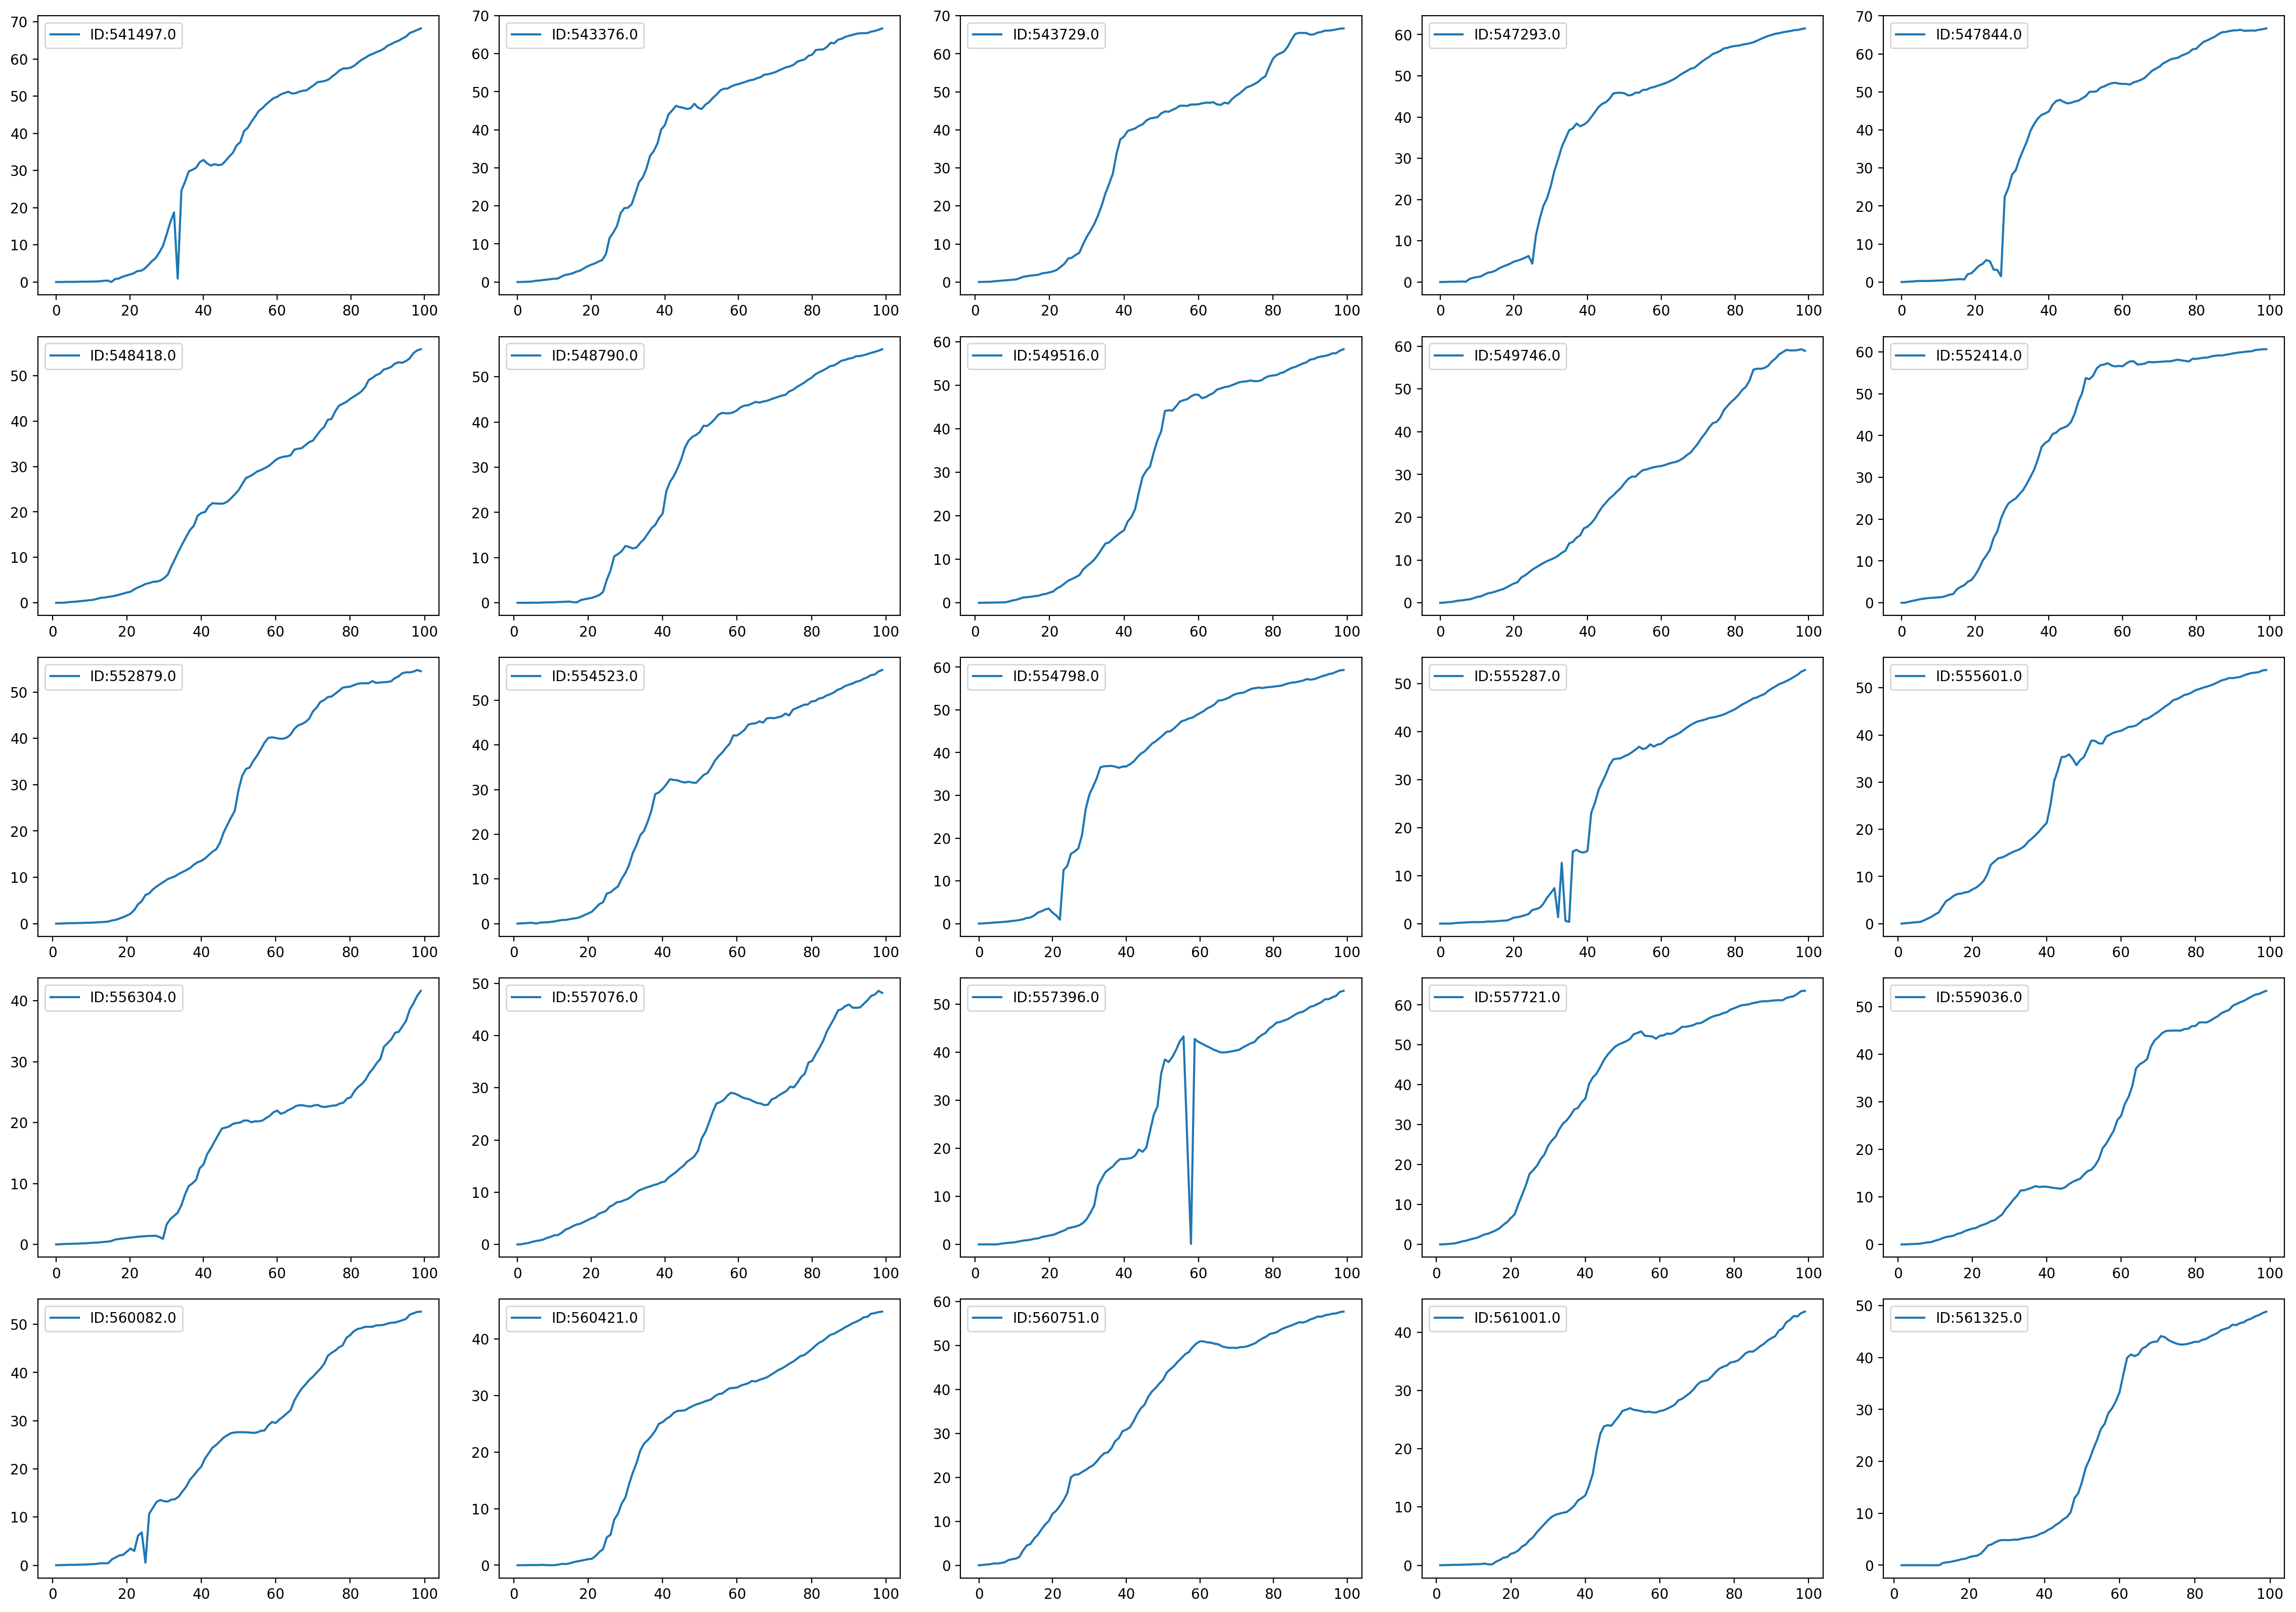

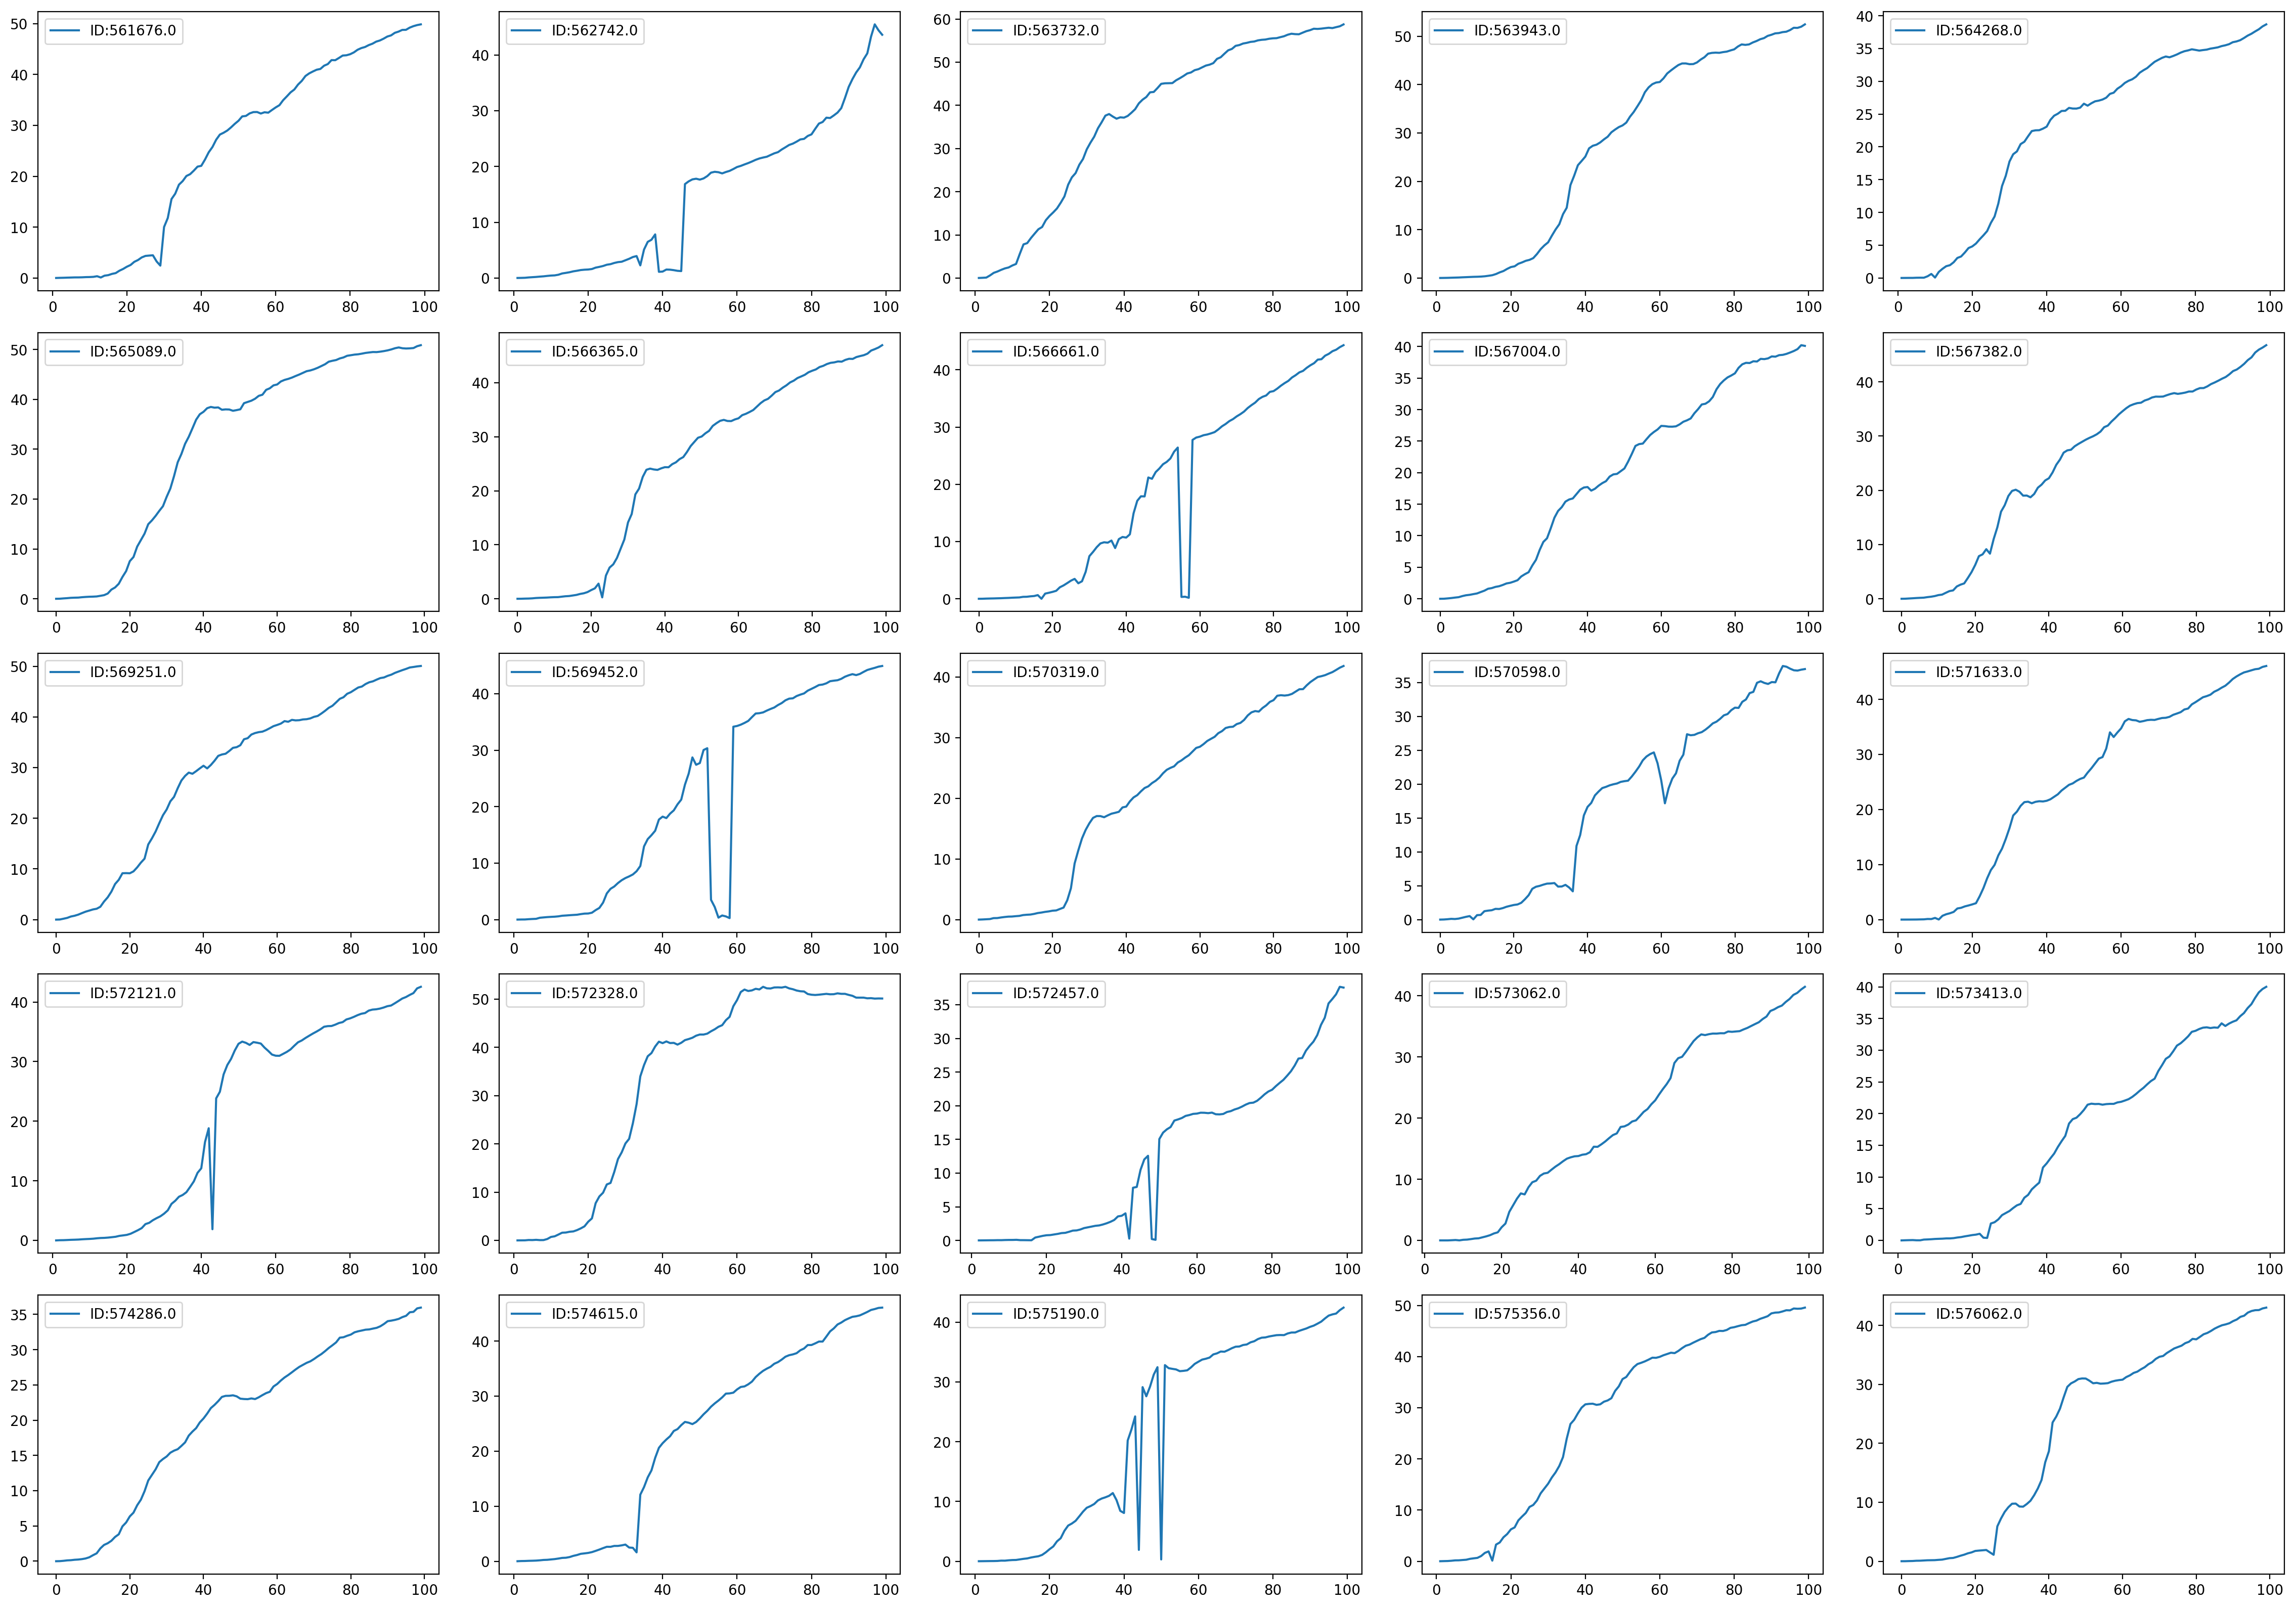

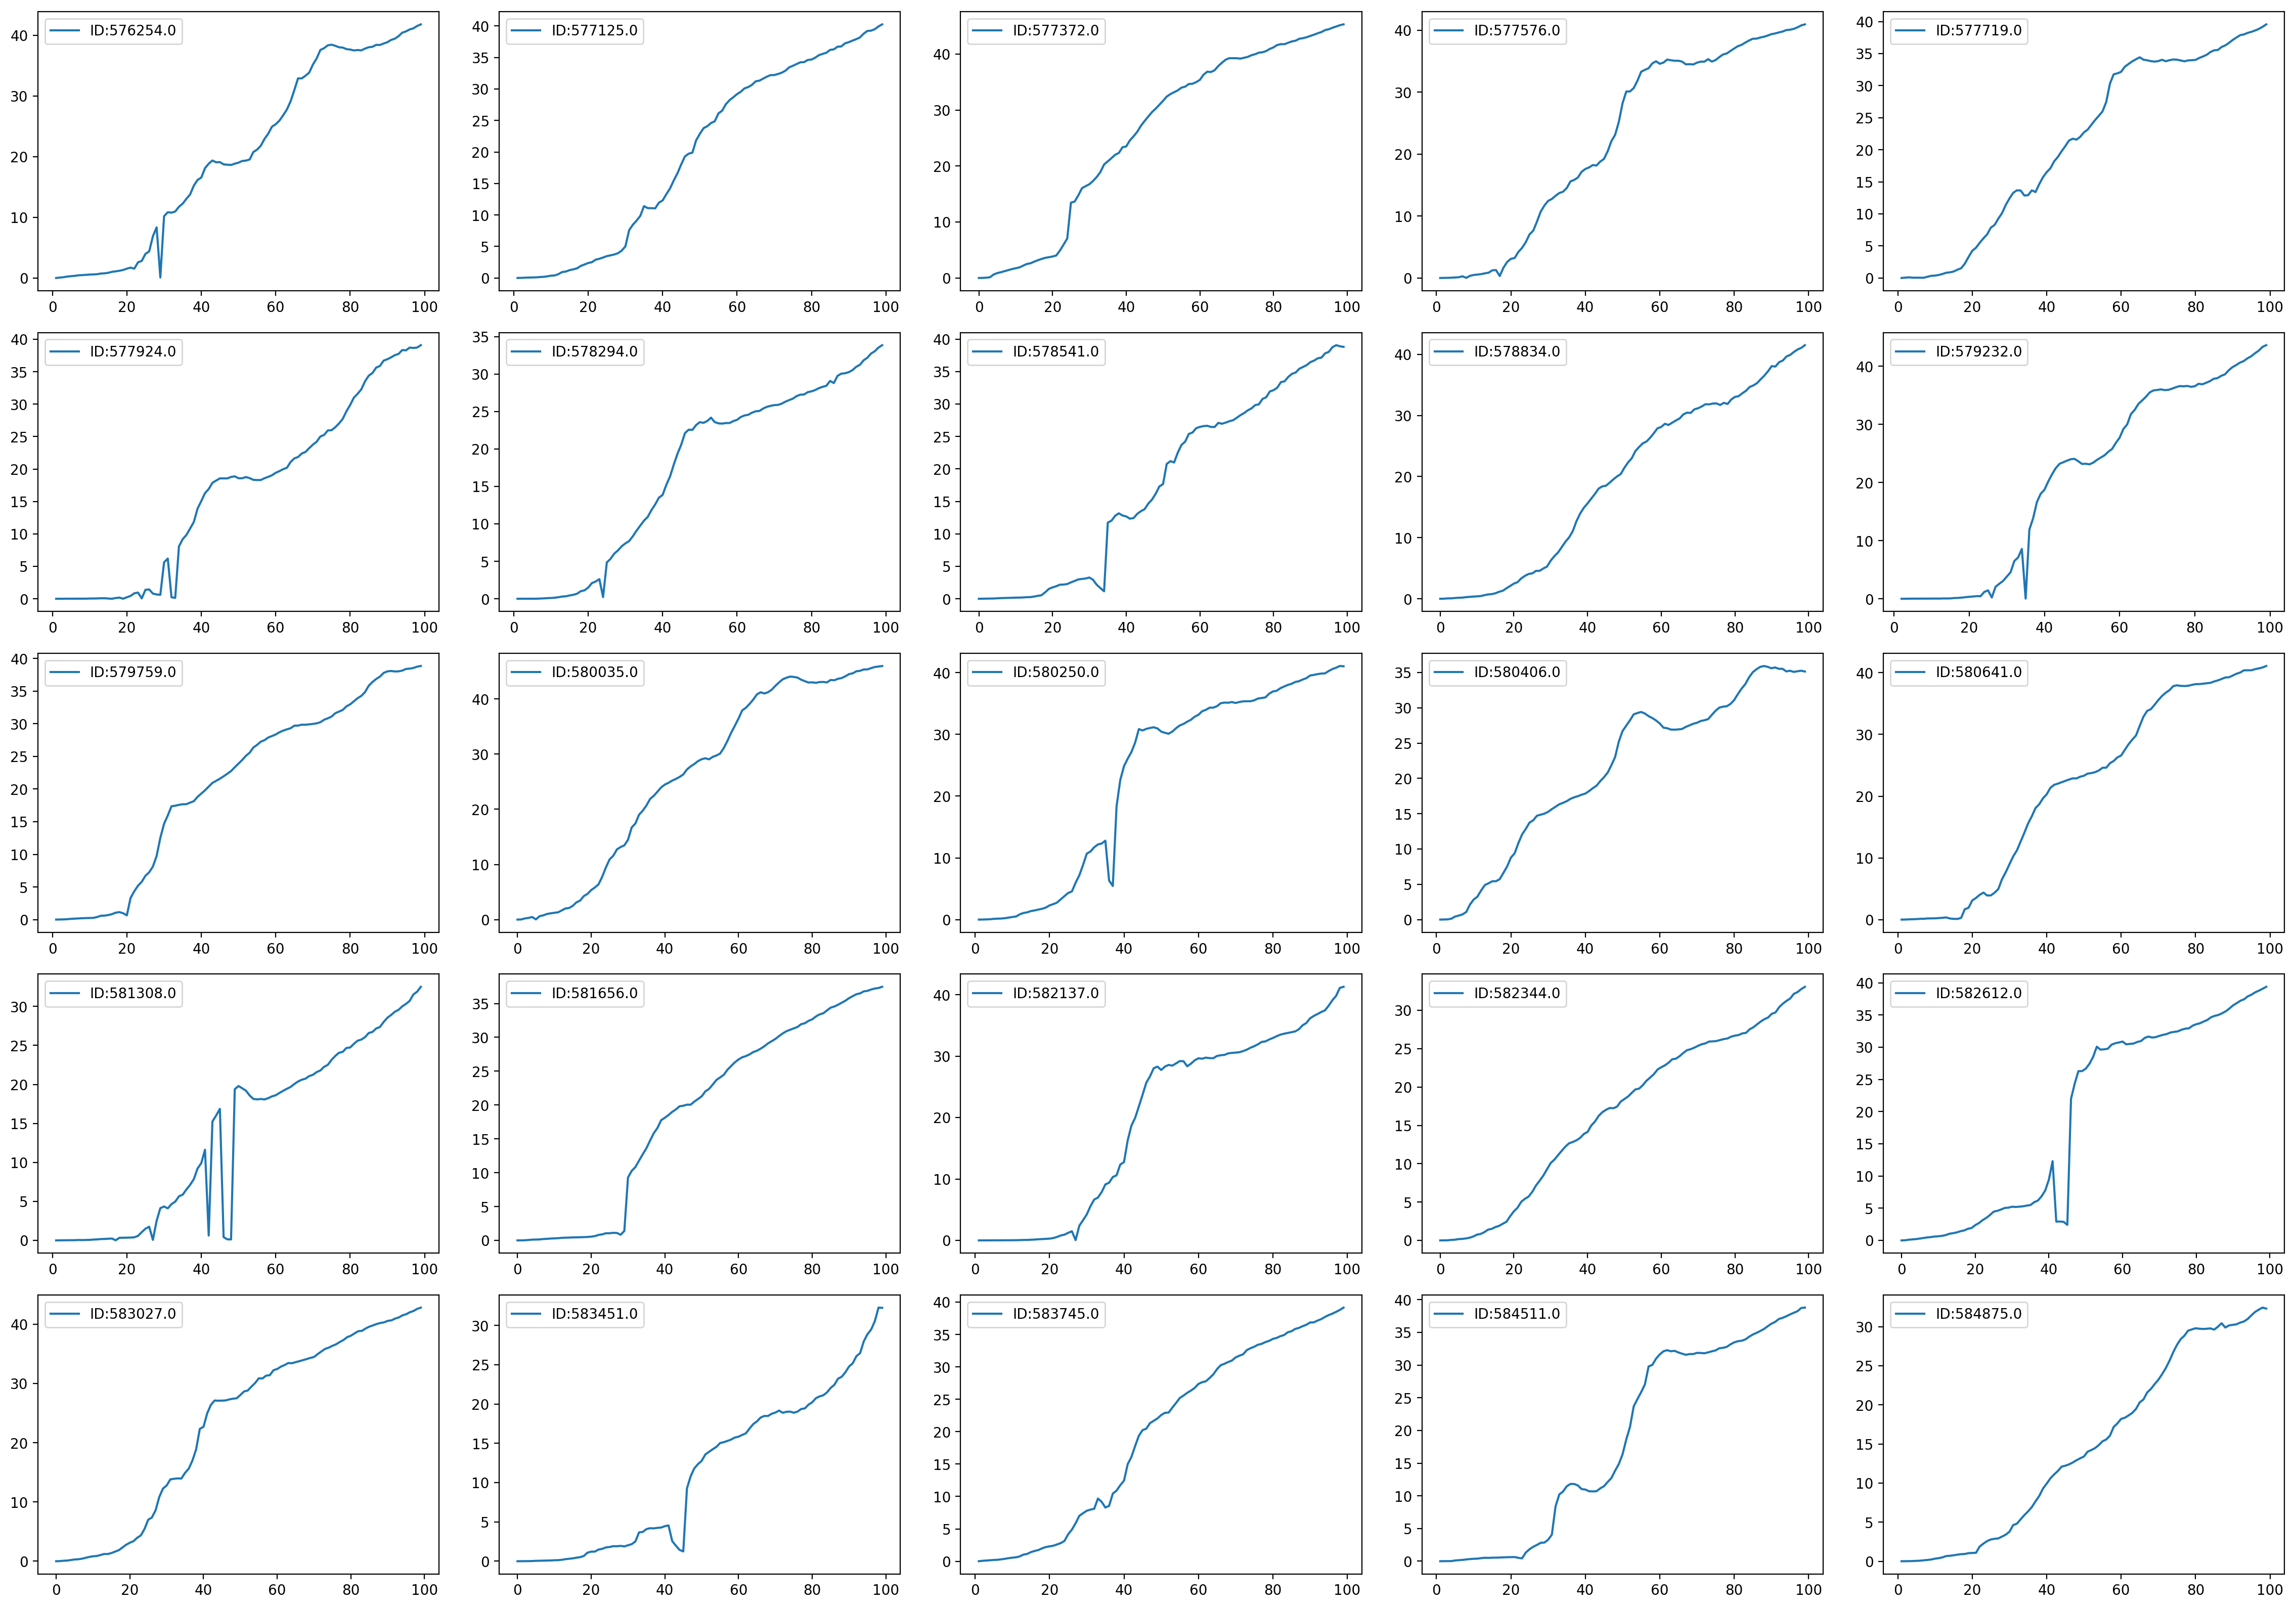

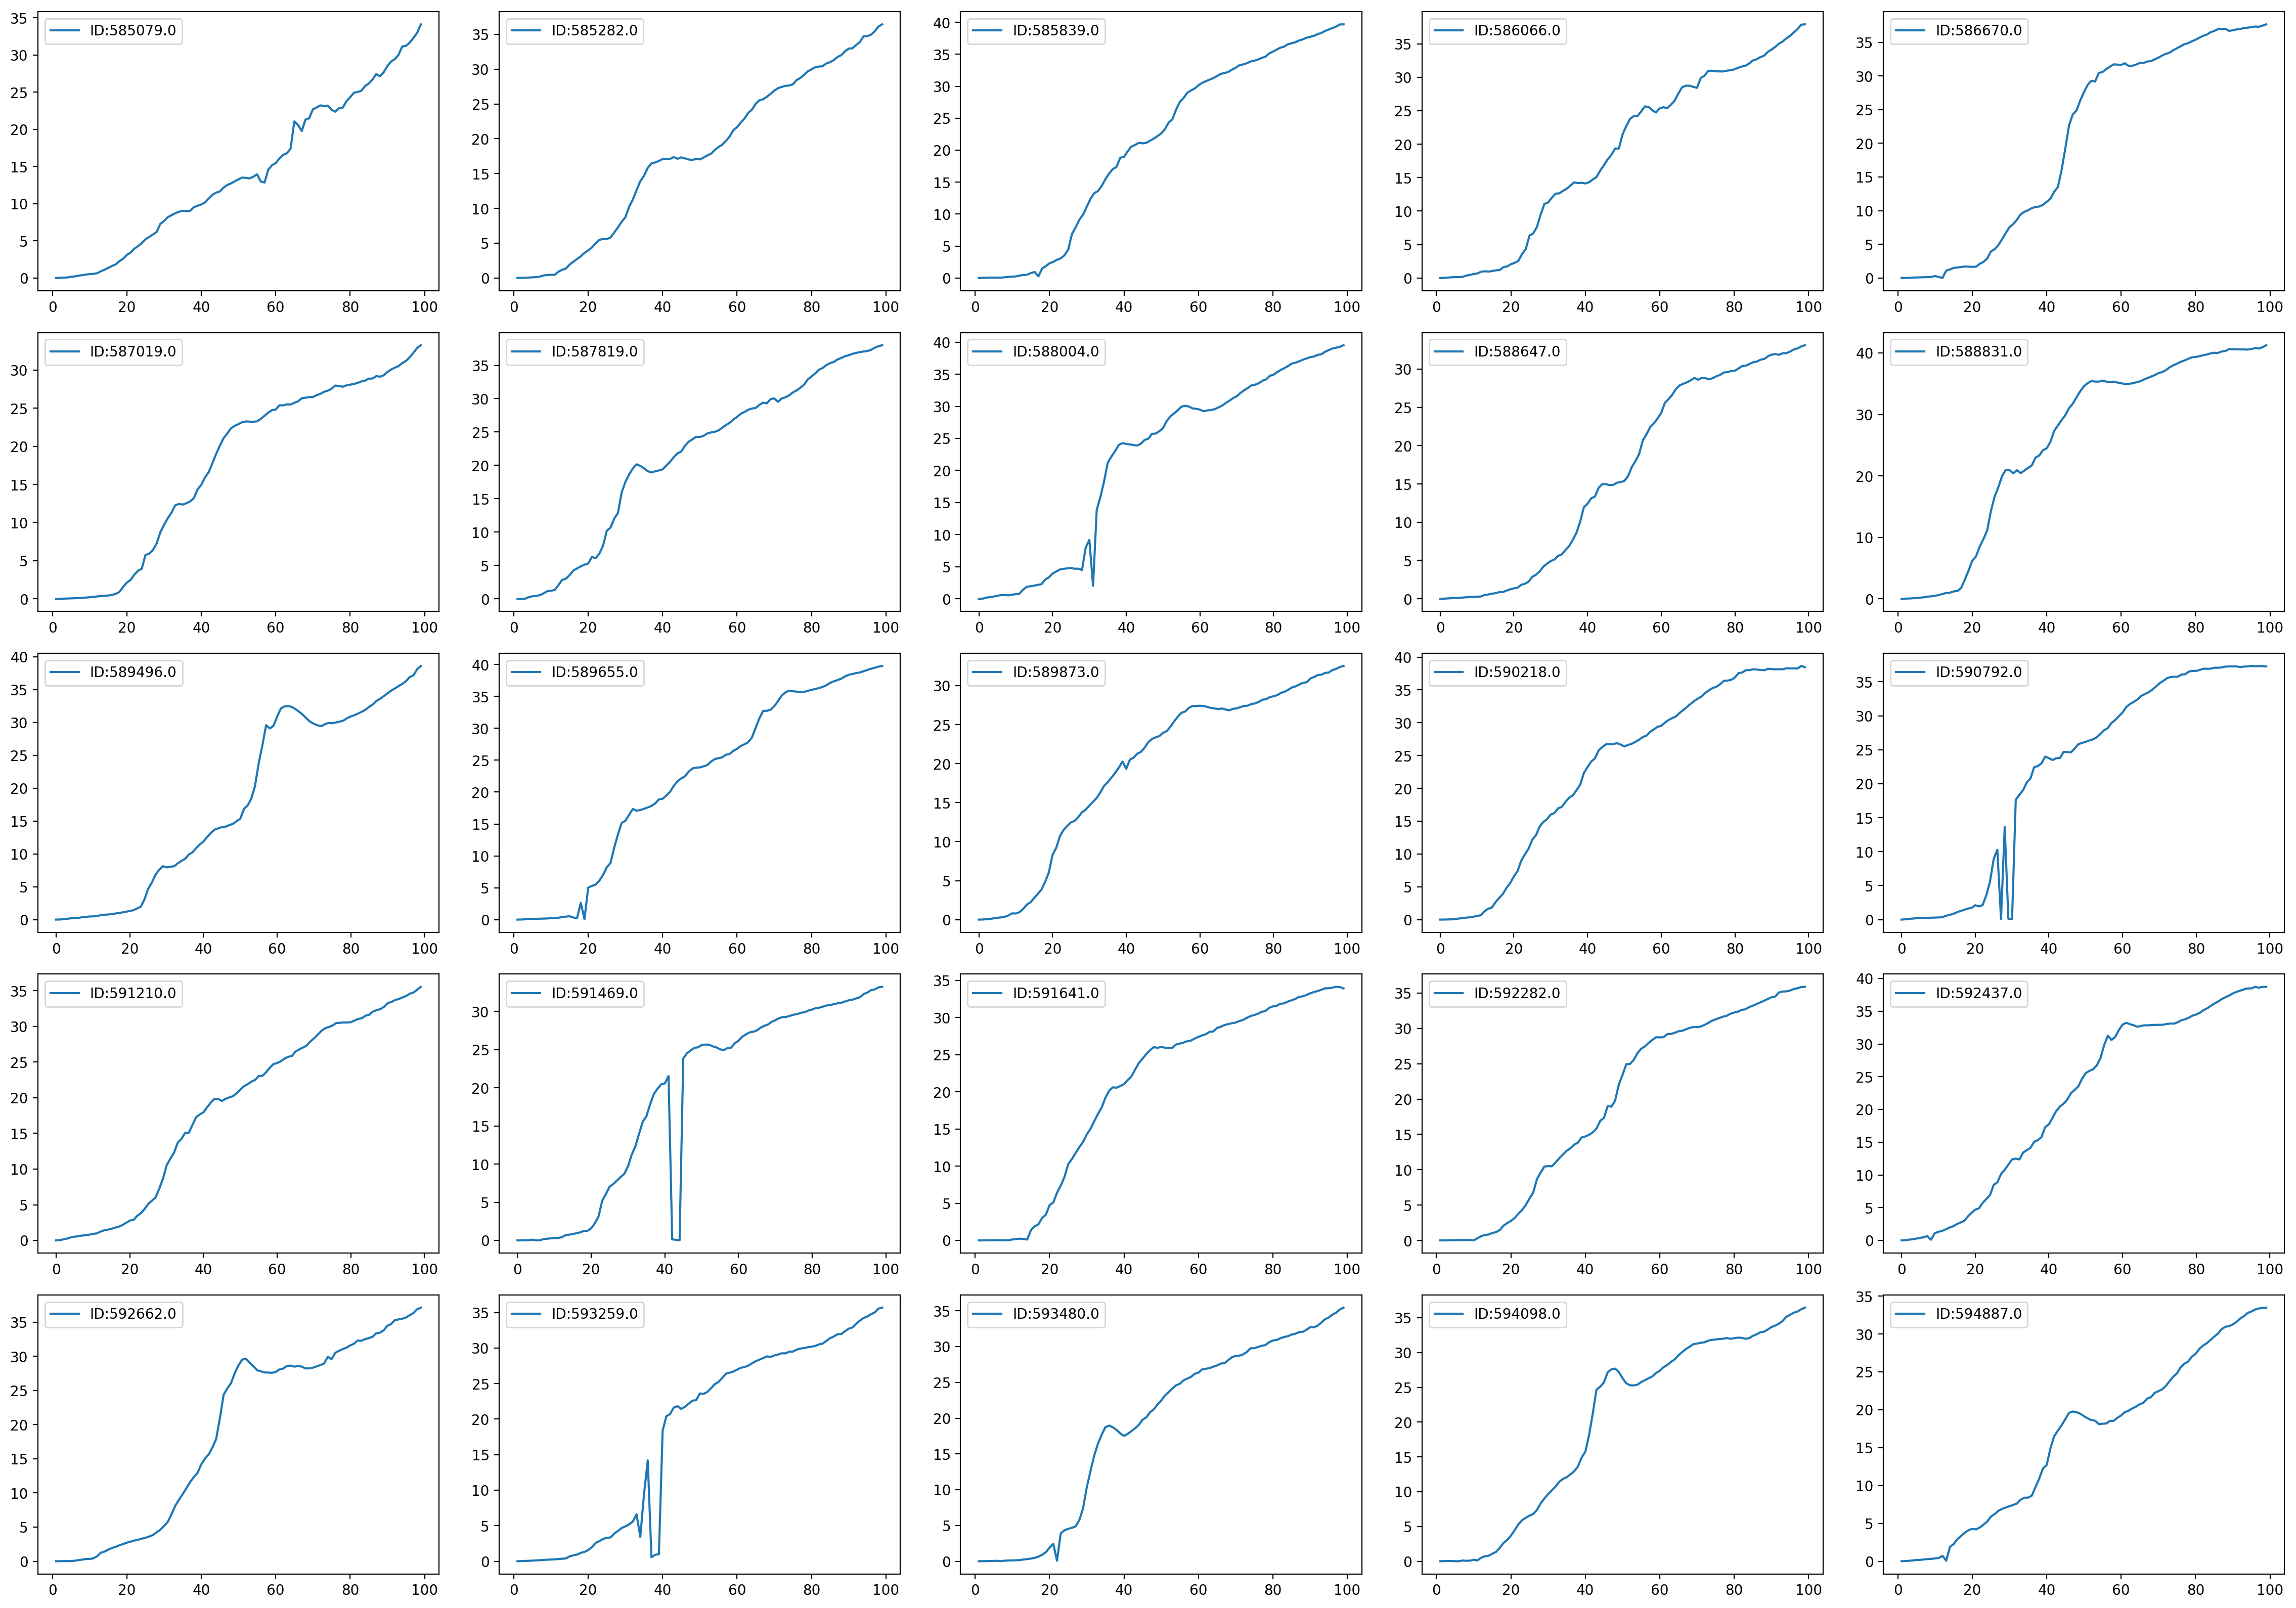

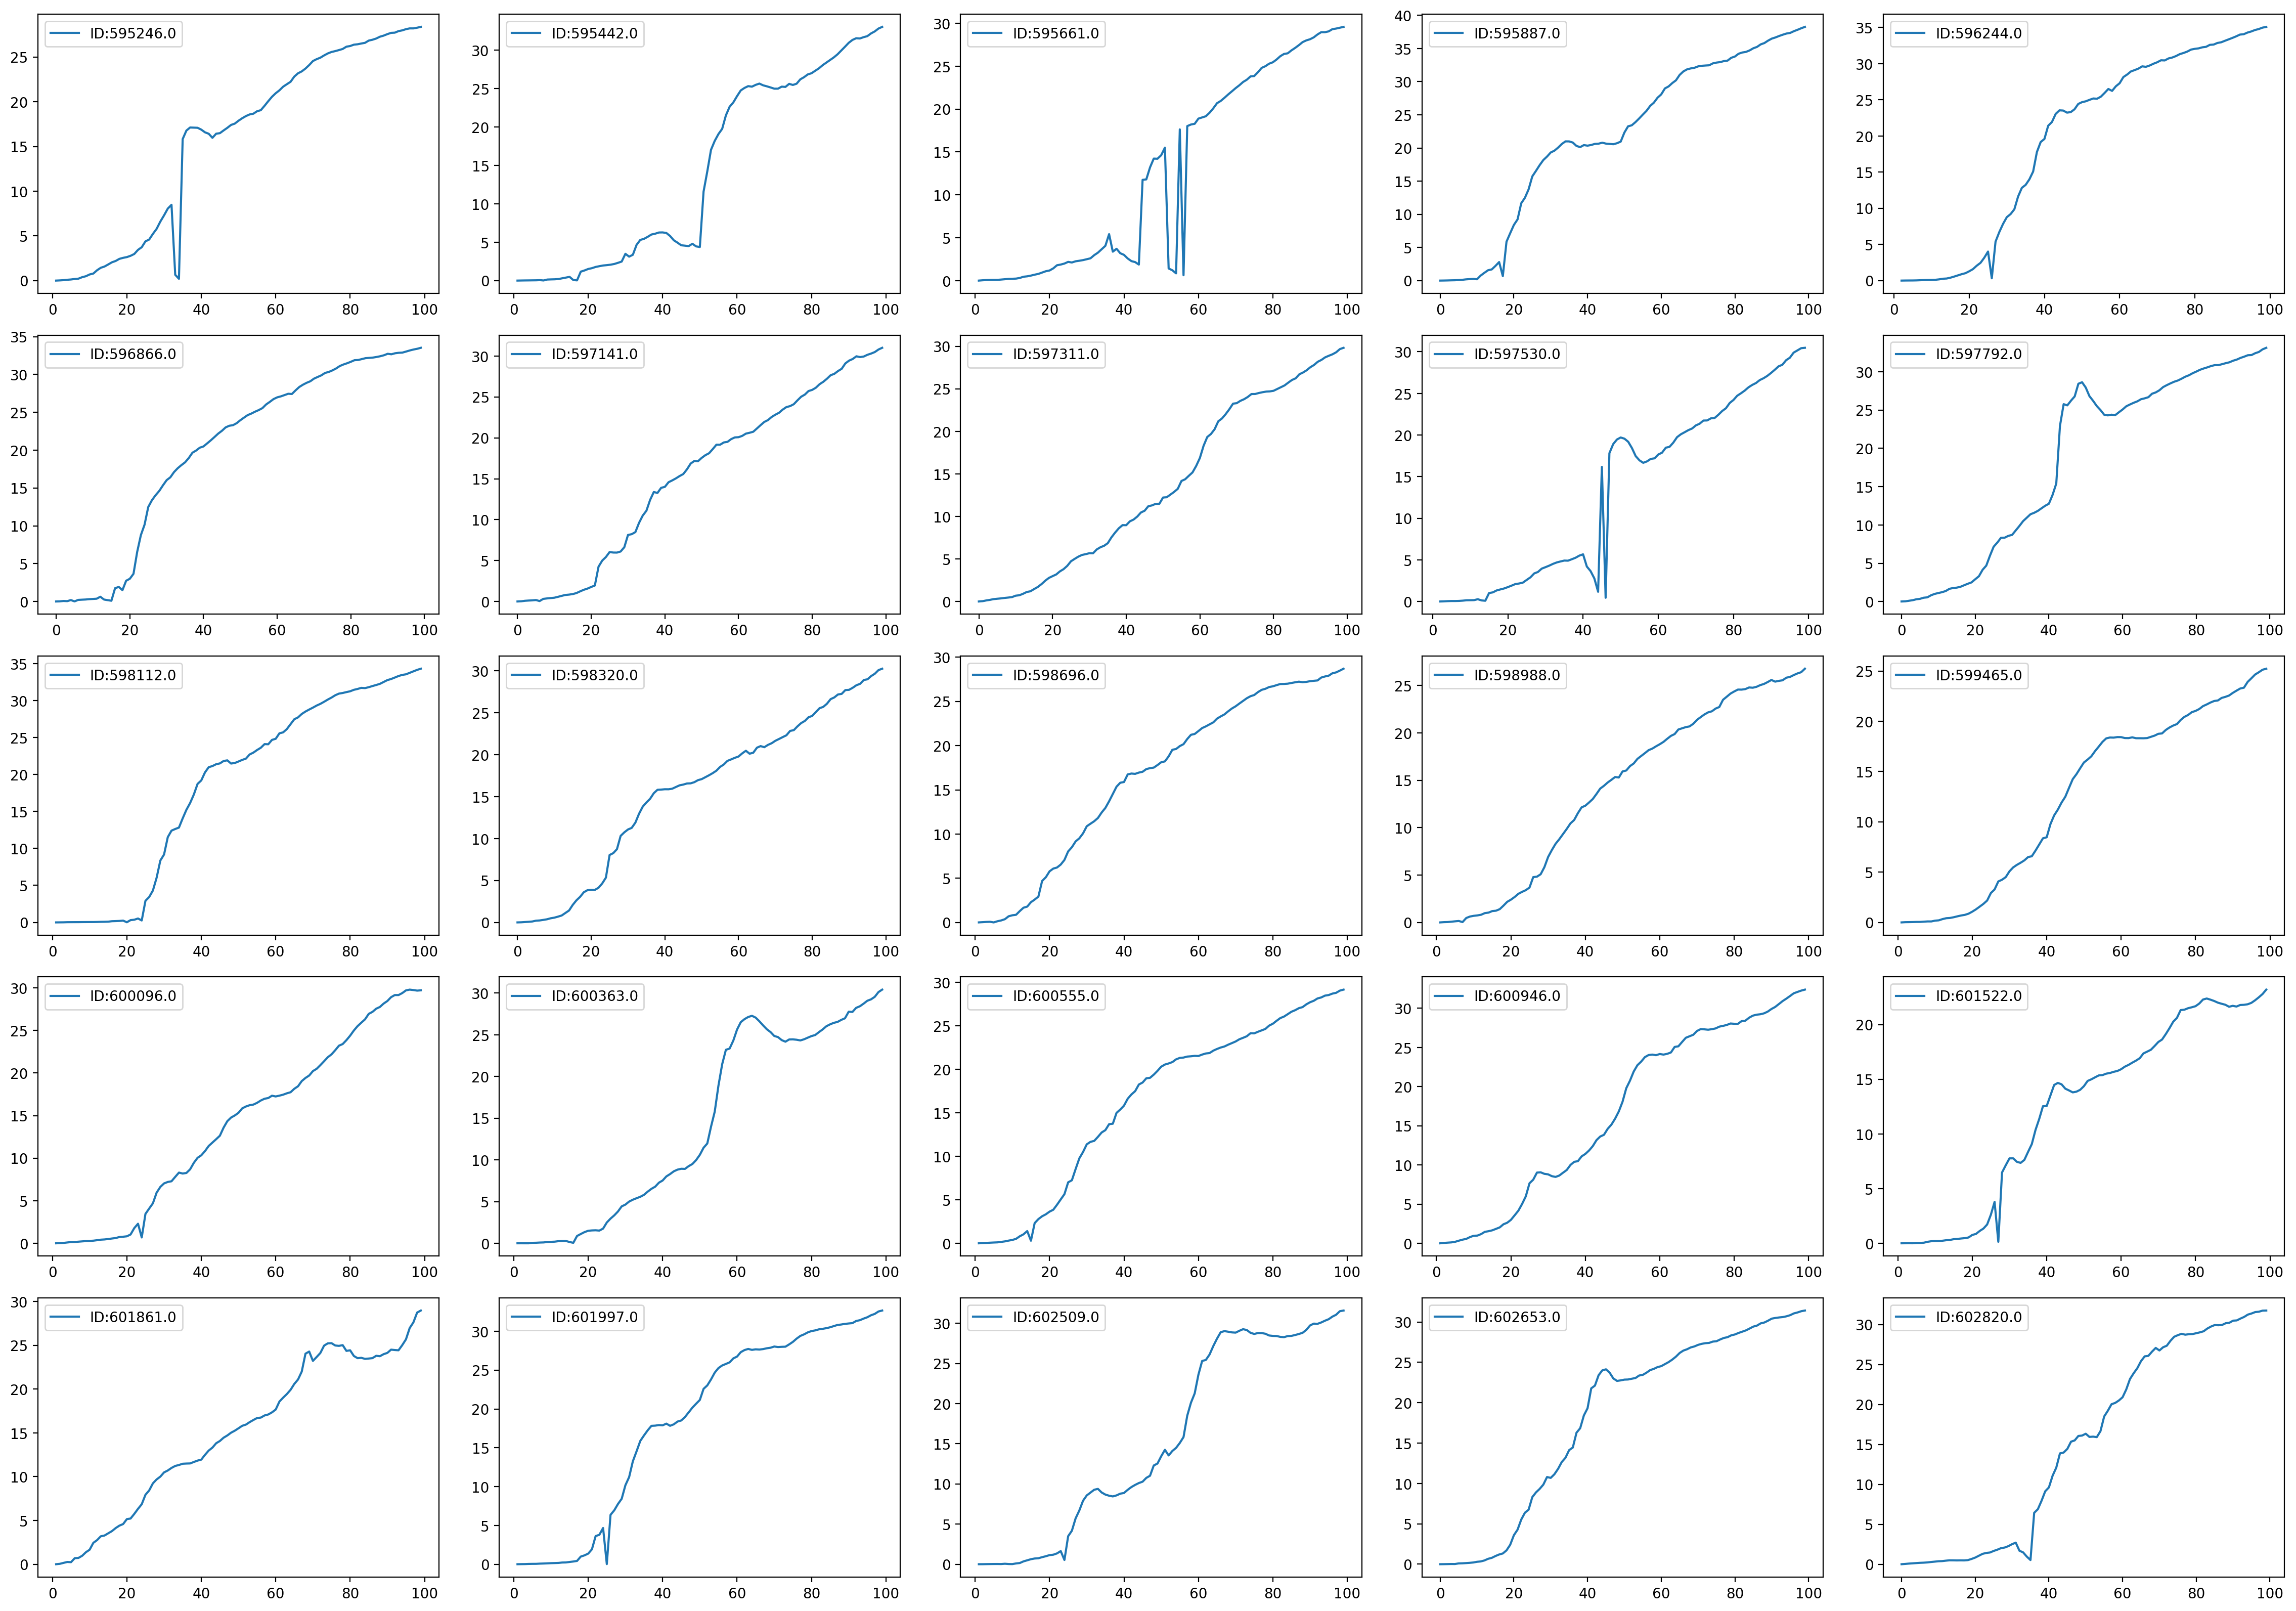

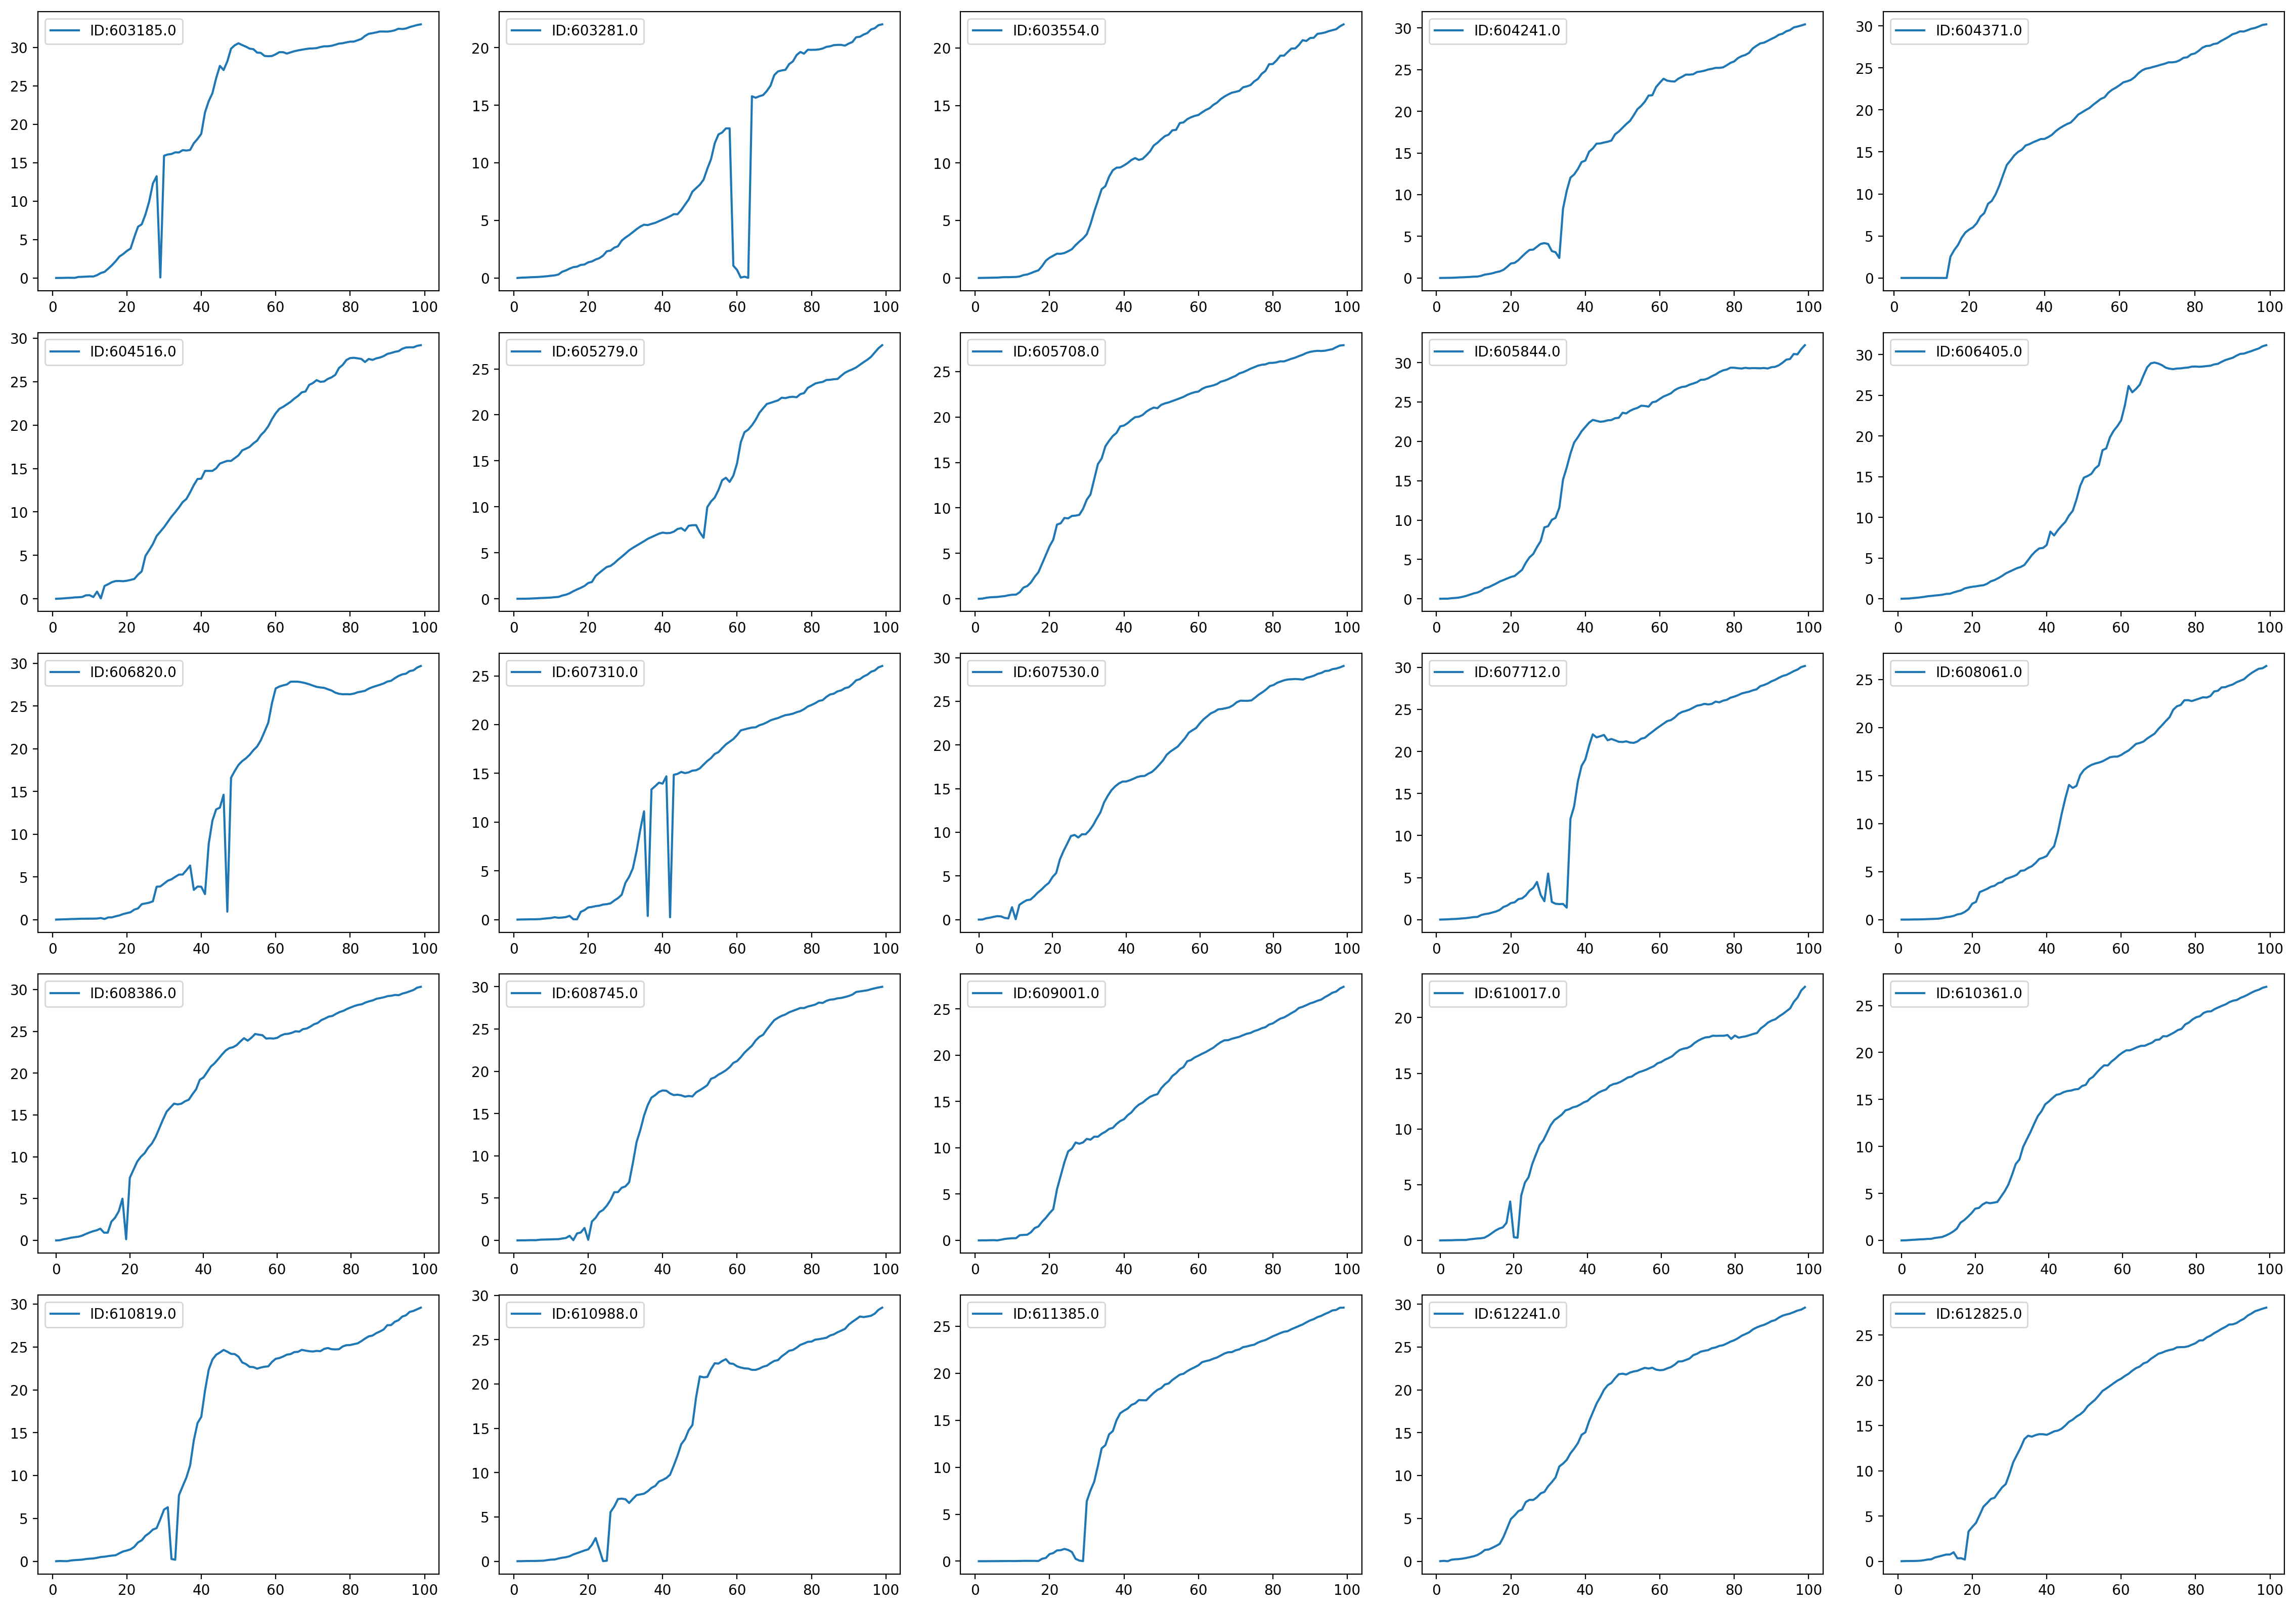

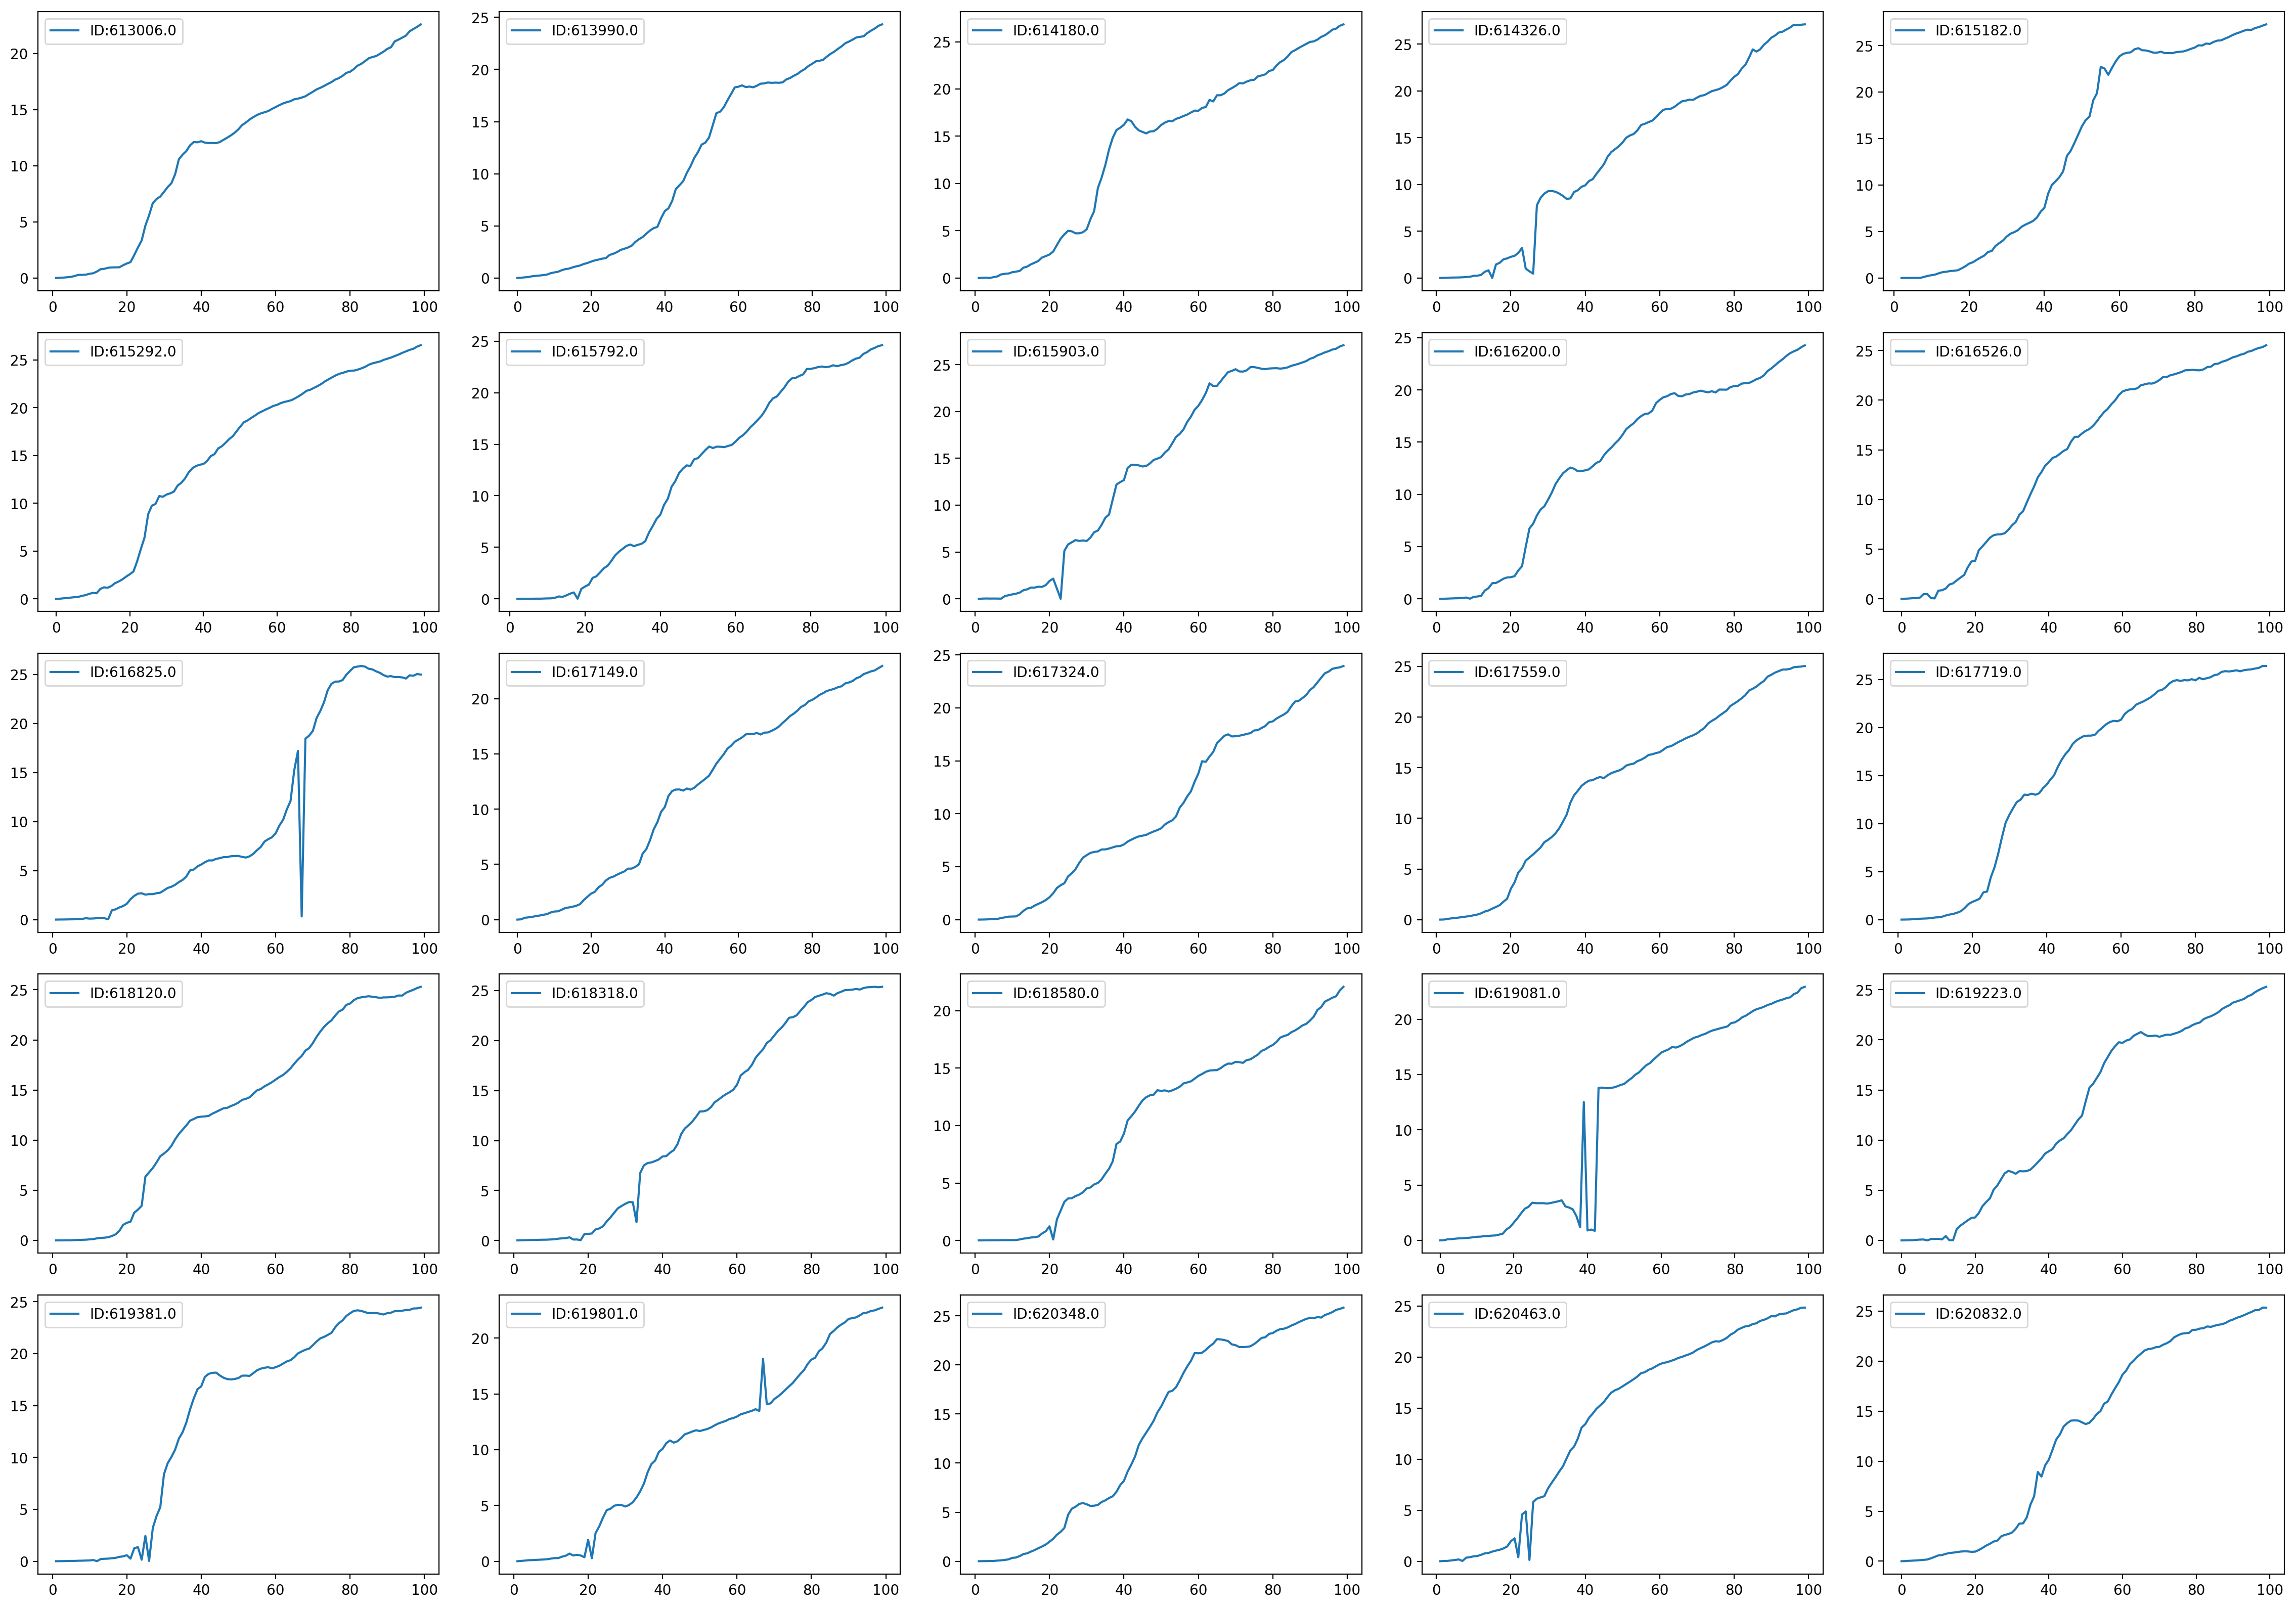

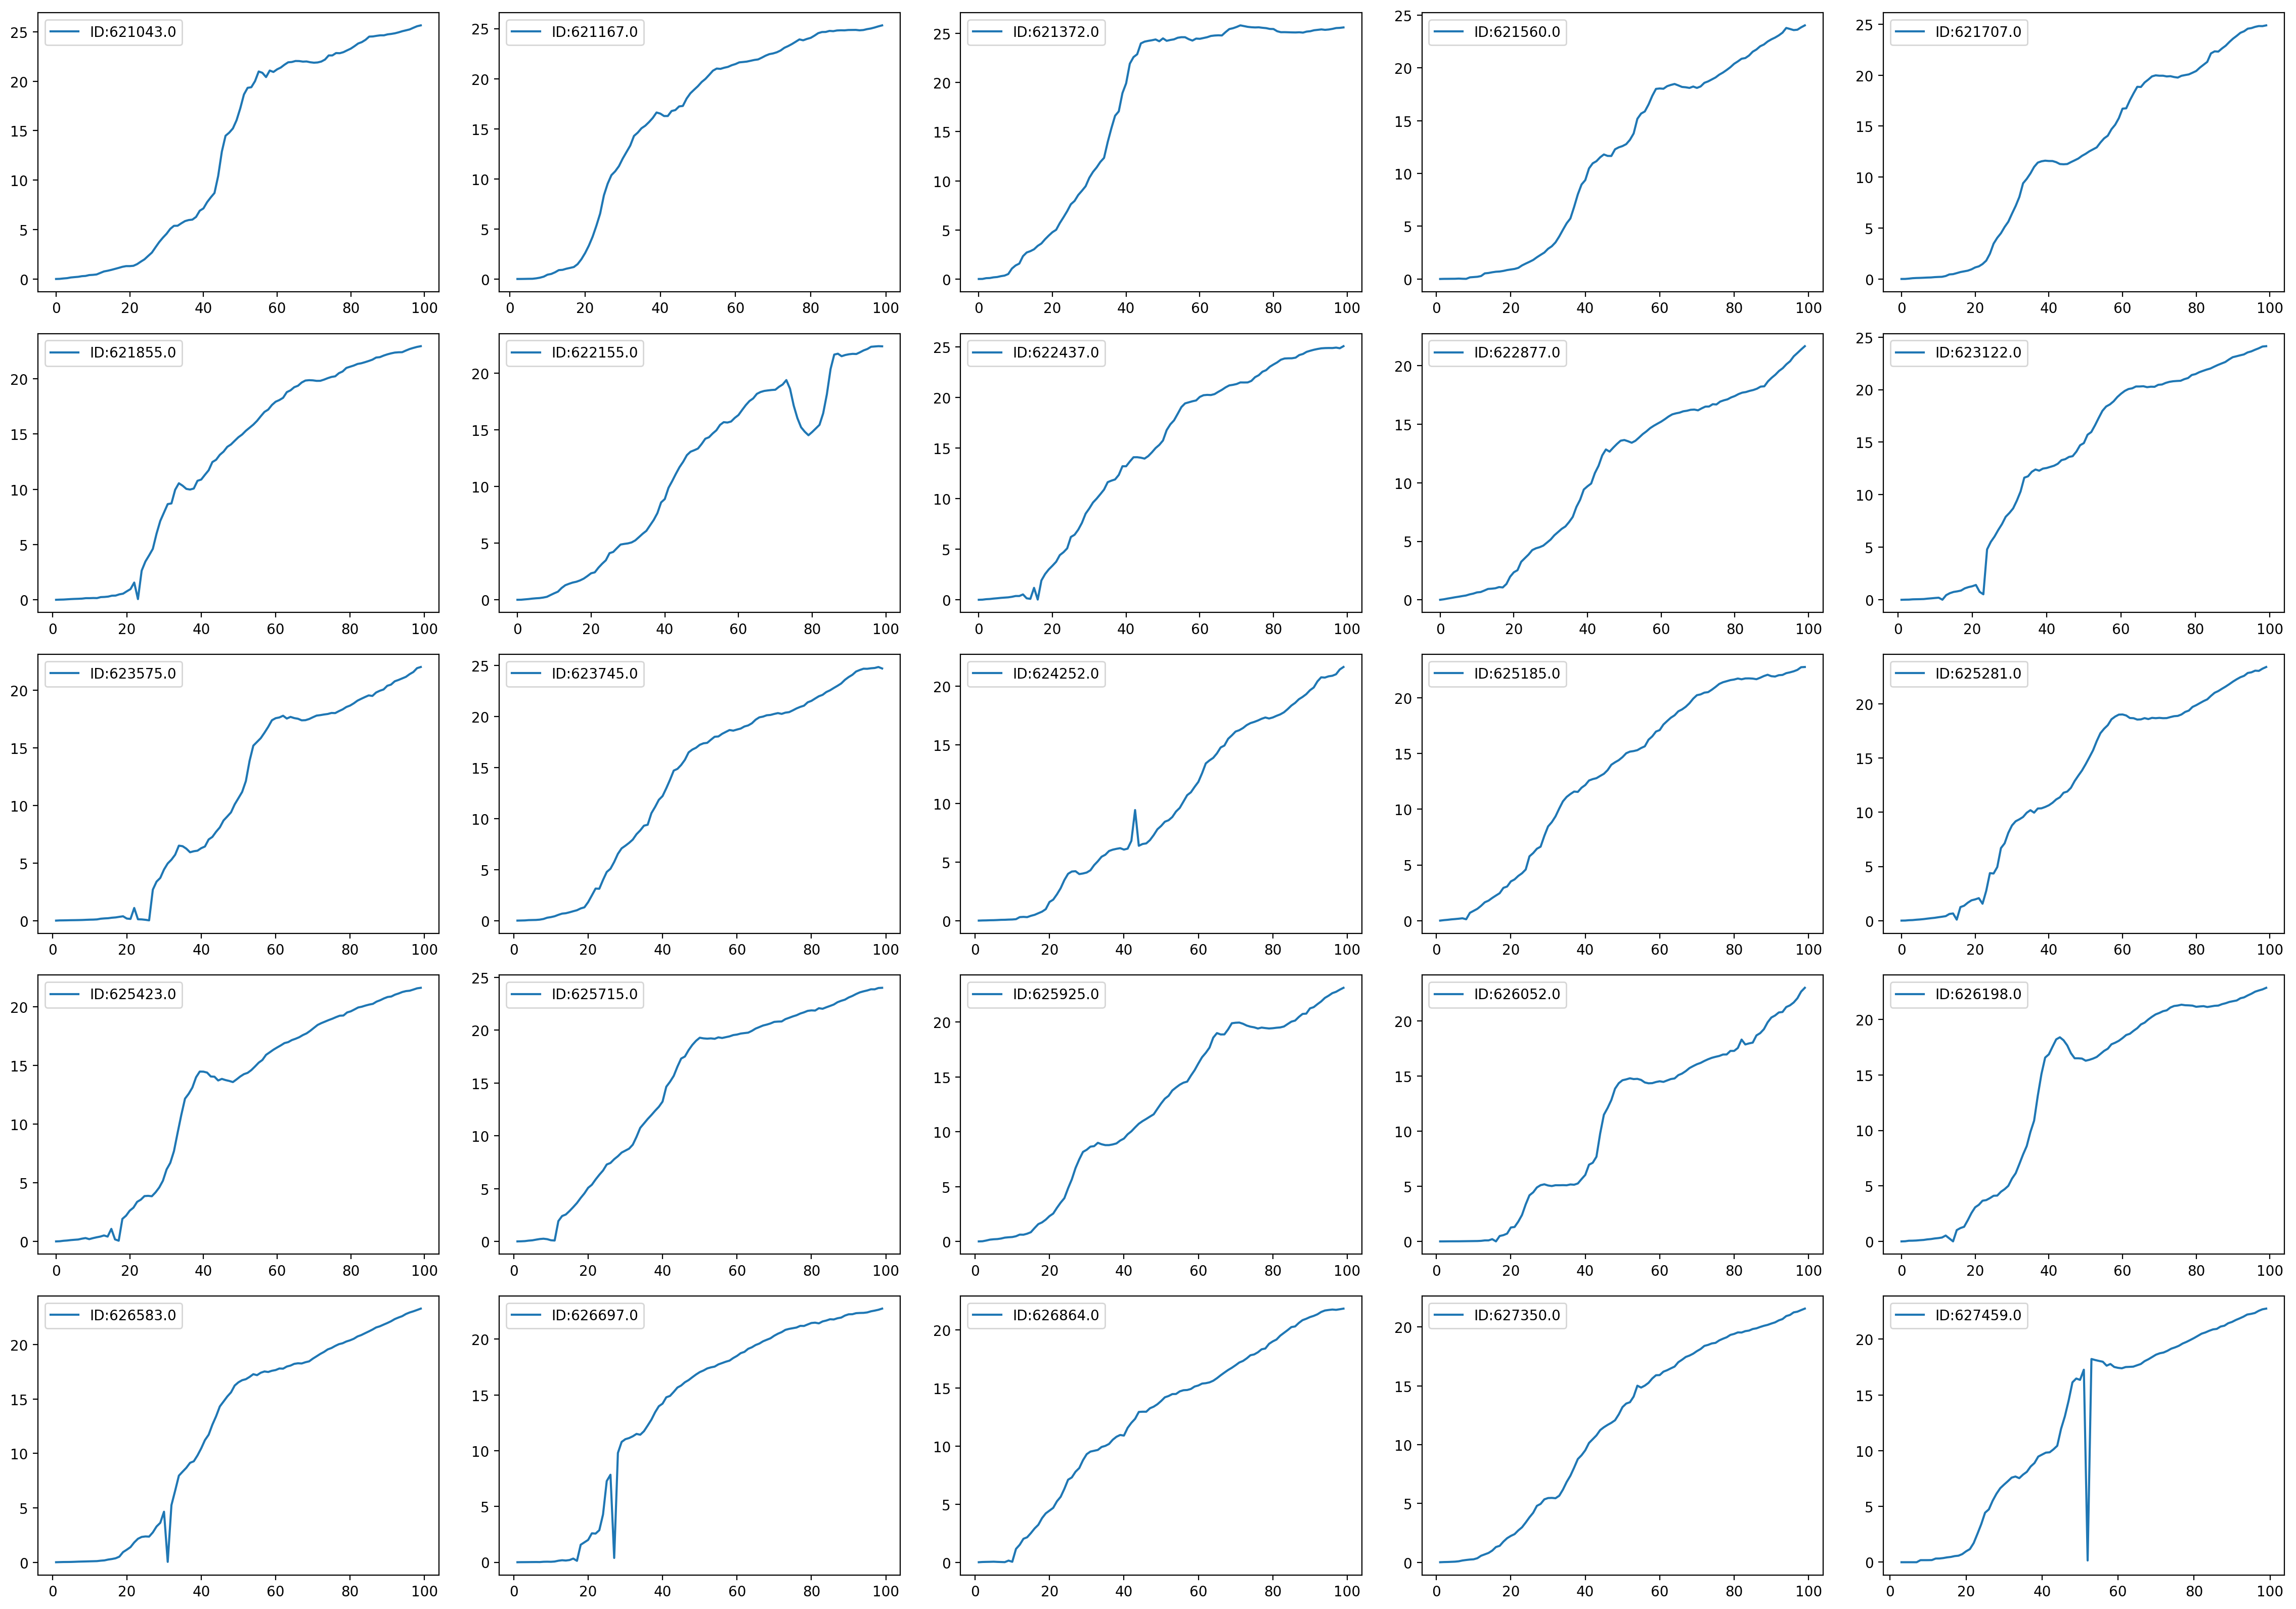

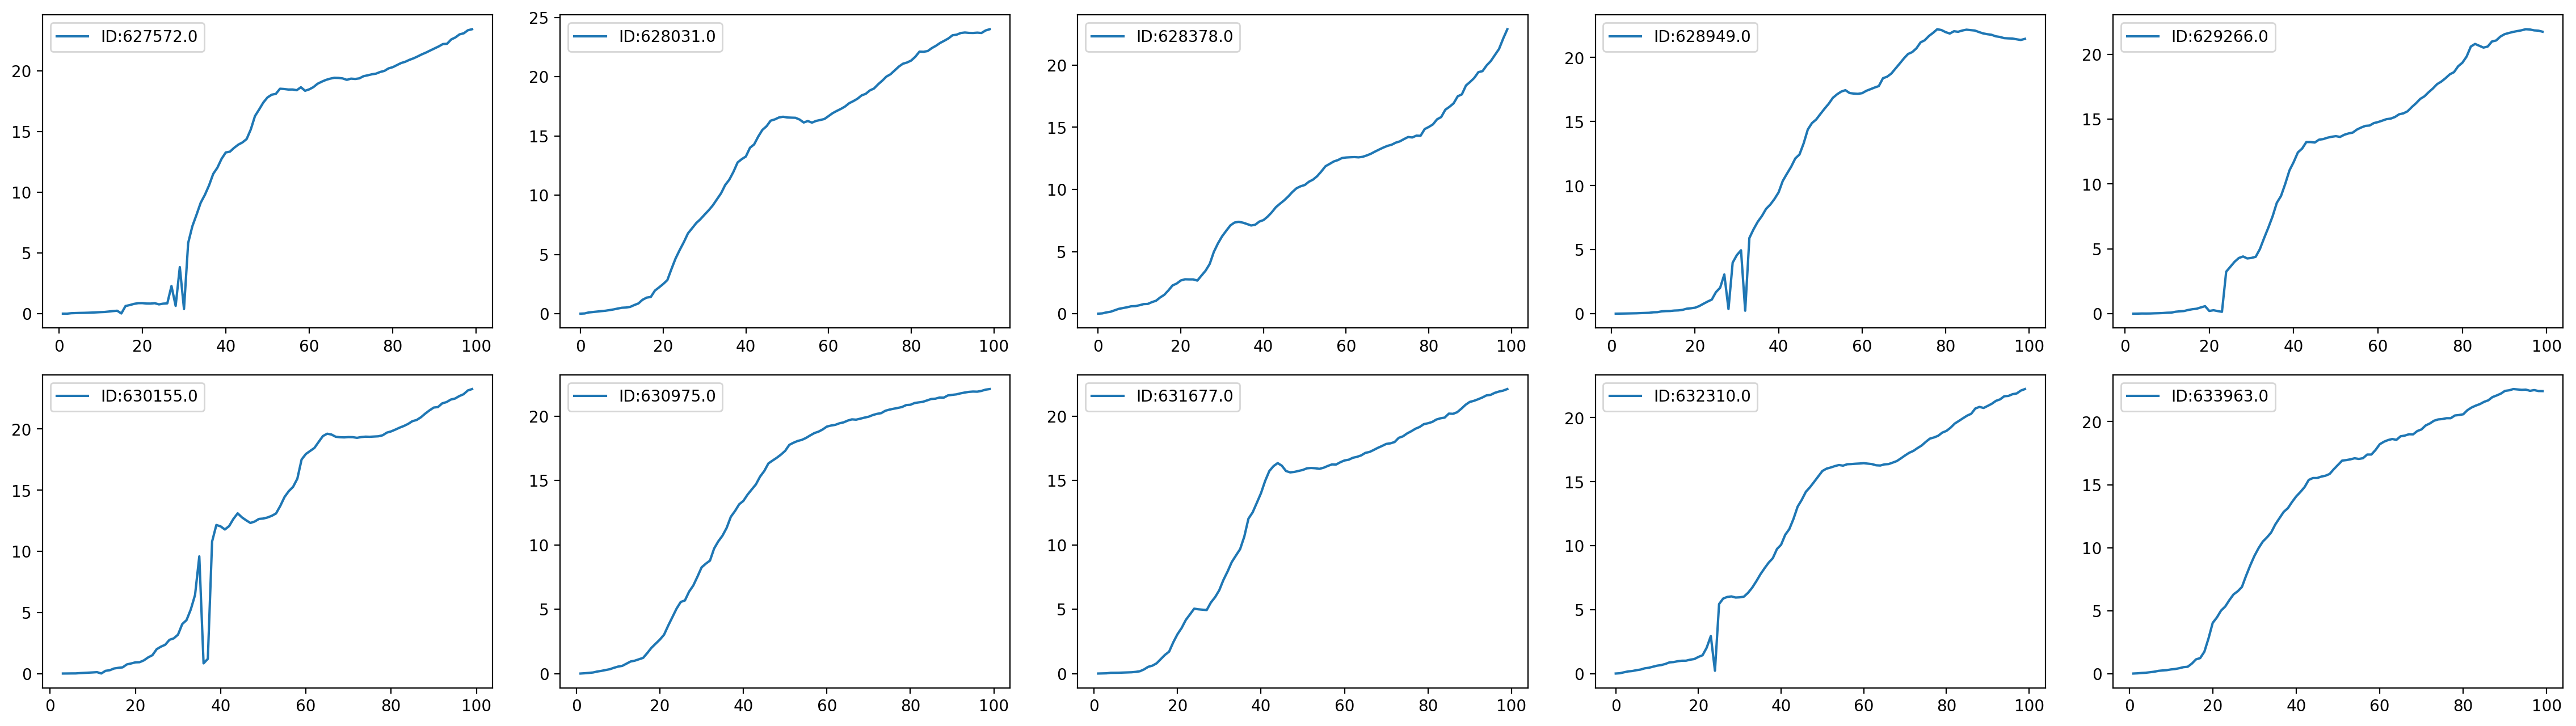

In [7]:
Classified_subhalos = np.genfromtxt('Classified_subhalos_TNG50-1.csv',skip_header=1,delimiter=',')
basePath = "sims.TNG/TNG50-1/output"
fields = ['SubhaloMass','SubfindID','SnapNum']


for start in tqdm(range(0,251,25)):
    inicio = start
    index = inicio
    
    Subhalos_ids = Classified_subhalos[:,1]
    
    fig = plt.figure(figsize=(28.66, 20.46), dpi=200)
    outer = gridspec.GridSpec(5, 5, wspace=0.15, hspace=0.15)
    
    for i in range(25):
        if index == 260:
            break
        subhaloid = Subhalos_ids[index]
        inner = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)
        ax = plt.Subplot(fig, inner[0:5])
        
        tree = il.sublink.loadTree(basePath,99,subhaloid,fields=fields,onlyMPB=True)
        ax.plot(tree['SnapNum'],tree['SubhaloMass'],'-',label=str('ID:'+str(subhaloid)))
        ax.legend()
        fig.add_subplot(ax)
        index += 1
    fig.savefig('subhalo_images/Subhalos_trees_%s.png'%inicio)
    print('subhalo_images/Subhalos_trees_%s.png'%inicio)